# PREPROCESSING ET MODELISATION

Dans ce notebook, nous allons mettre en forme les données et construire nos modèles d'apprentissage.

![title](https://hackernoon.com/hn-images/1*-bqV4YyZtlz9EUxi8levjw.jpeg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <u>Analyse des données</u>

Nous allons effectuer une rapide analyse du dataset afin de comprendre un peu mieux les données

In [2]:
data = pd.read_csv("data_prepared.csv")

In [3]:
data.head()

Unnamed: 0                customer_unique_id  nbr_commandes  \
0           0  861eff4711a542e4b93843c6dd7febb0              1   
1           1  452fab1c62b178922fc011b0eb89c1b9              1   
2           2  613259d64ba972e49dc25b019b7918c3              1   
3           3  aaad33c5051196b5e73c7d65b9072e1d              1   
4           4  35c0fa6f2e6bbb3576e725d22e1066b8              1   

   juste_1_commandes  de_2_4_commandes  de_4_6_commandes  de_6_8_commandes  \
0                  1                 0                 0                 0   
1                  1                 0                 0                 0   
2                  1                 0                 0                 0   
3                  1                 0                 0                 0   
4                  1                 0                 0                 0   

   de_8_10_commandes  de_10_commandes_et_plus  anciennete_client  ...  \
0                  0                        0                571  ...   
1                  0                        0                 37  ...   
2                  0                        0                514  ...   
3                  0                        0                270  ...   
4                  0                        0                589  ...   

   de_200_400_dollars  de_400_600_dollars  de_600_800_dollars  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   0   

   de_800_1000_dollars  de_1000_1200_dollars  de_1200_1400_dollars  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   de_1400_1600_dollars  de_1600_1800_dollars  de_1800_2000_dollars  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   plus_de_2000_dollars  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 63 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91827 entries, 0 to 91826
Data columns (total 63 columns):
Unnamed: 0                                      91827 non-null int64
customer_unique_id                              91827 non-null object
nbr_commandes                                   91827 non-null int64
juste_1_commandes                               91827 non-null int64
de_2_4_commandes                                91827 non-null int64
de_4_6_commandes                                91827 non-null int64
de_6_8_commandes                                91827 non-null int64
de_8_10_commandes                               91827 non-null int64
de_10_commandes_et_plus                         91827 non-null int64
anciennete_client                               91827 non-null int64
date_derniere_commande                          91827 non-null int64
geolocation_lat                                 91827 non-null float64
geolocation_lng                                 91827 non-nu

In [5]:
data.describe()

Unnamed: 0  nbr_commandes  juste_1_commandes  de_2_4_commandes  \
count  91827.000000   91827.000000       91827.000000      91827.000000   
mean   45913.000000       1.033084           0.970238          0.029262   
std    26508.315922       0.206864           0.169932          0.168540   
min        0.000000       1.000000           0.000000          0.000000   
25%    22956.500000       1.000000           1.000000          0.000000   
50%    45913.000000       1.000000           1.000000          0.000000   
75%    68869.500000       1.000000           1.000000          0.000000   
max    91826.000000      14.000000           1.000000          1.000000   

       de_4_6_commandes  de_6_8_commandes  de_8_10_commandes  \
count      91827.000000      91827.000000       91827.000000   
mean           0.000414          0.000065           0.000011   
std            0.020339          0.008083           0.003300   
min            0.000000          0.000000           0.000000   
25%            0.000000          0.000000           0.000000   
50%            0.000000          0.000000           0.000000   
75%            0.000000          0.000000           0.000000   
max            1.000000          1.000000           1.000000   

       de_10_commandes_et_plus  anciennete_client  date_derniere_commande  \
count             91827.000000       91827.000000            9.182700e+04   
mean                  0.000011         332.273449            1.546791e+07   
std                   0.003300         176.658739            8.663954e+06   
min                   0.000000           0.000000            1.012018e+06   
25%                   0.000000         191.000000            8.052017e+06   
50%                   0.000000         314.000000            1.509202e+07   
75%                   0.000000         462.000000            2.304202e+07   
max                   1.000000        1003.000000            3.112202e+07   

       ...  de_200_400_dollars  de_400_600_dollars  de_600_800_dollars  \
count  ...        91827.000000        91827.000000        91827.000000   
mean   ...            0.138903            0.029447            0.014386   
std    ...            0.345847            0.169056            0.119075   
min    ...            0.000000            0.000000            0.000000   
25%    ...            0.000000            0.000000            0.000000   
50%    ...            0.000000            0.000000            0.000000   
75%    ...            0.000000            0.000000            0.000000   
max    ...            1.000000            1.000000            1.000000   

       de_800_1000_dollars  de_1000_1200_dollars  de_1200_1400_dollars  \
count         91827.000000          91827.000000          91827.000000   
mean              0.007264              0.003692              0.002962   
std               0.084917              0.060648              0.054345   
min               0.000000              0.000000              0.000000   
25%               0.000000              0.000000              0.000000   
50%               0.000000              0.000000              0.000000   
75%               0.000000              0.000000              0.000000   
max               1.000000              1.000000              1.000000   

       de_1400_1600_dollars  de_1600_1800_dollars  de_1800_2000_dollars  \
count          91827.000000          91827.000000          91827.000000   
mean               0.001579              0.001035              0.000686   
std                0.039706              0.032148              0.026184   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       plus_de_2000_dollars  
count          91827.0

### Geolocalisation des clients

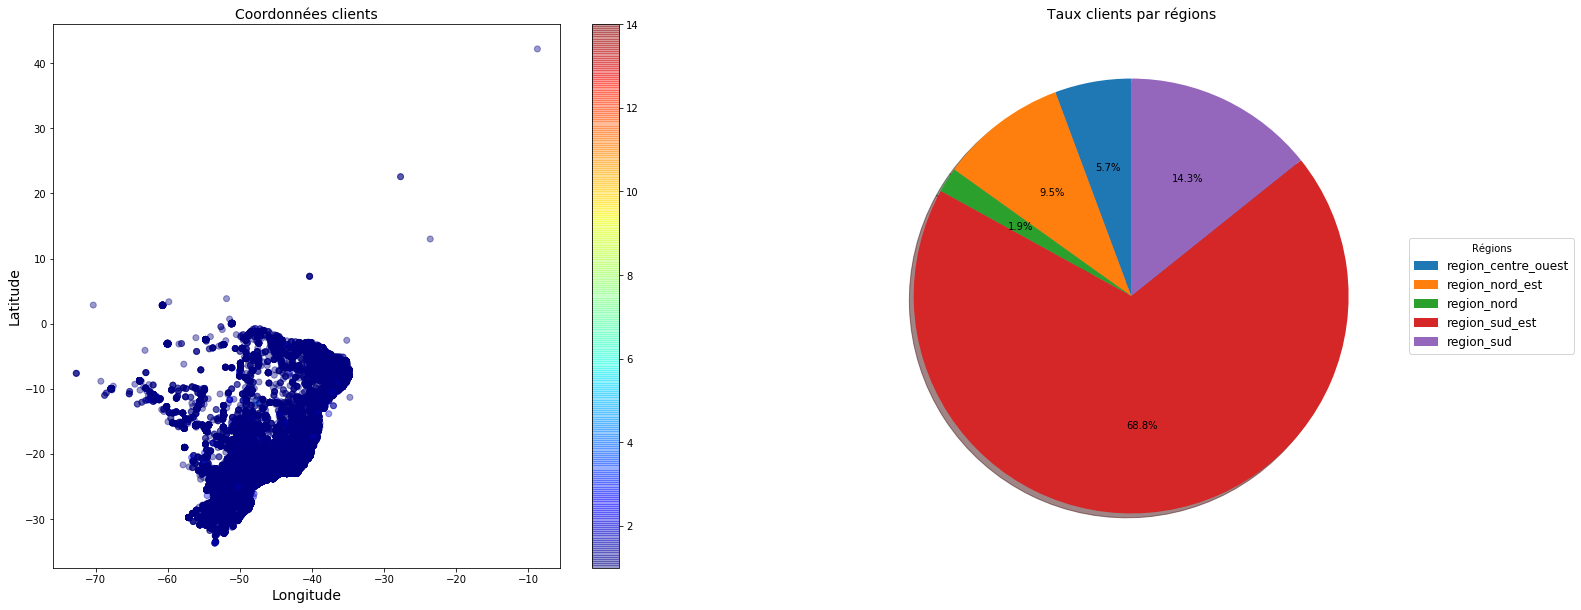

In [6]:
plt.subplots(figsize=(25, 10))

plt.subplot(1,2,1)
plt.scatter("geolocation_lng", "geolocation_lat", data=data, 
            alpha = 0.4, c=data["nbr_commandes"], cmap=plt.get_cmap("jet"))

plt.colorbar()
plt.title("Coordonnées clients", size=14)
plt.xlabel("Longitude", size=14)
plt.ylabel("Latitude", size=14)
#plt.xlim(-80,-30)
#plt.ylim(-40,10)

plt.subplot(1,2,2)

lst_regions = [
    "region_centre_ouest",
    "region_nord_est",
    "region_nord",
    "region_sud_est",
    "region_sud"
]

df = data.loc[:, lst_regions]

sizes = df.sum()
labels = lst_regions
explode = [0.1] * len(lst_regions)

plt.title("Taux clients par régions", size=14)

plt.pie(sizes,
        #explode=explode, 
        #labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90
       )

plt.legend(labels,
           title="Régions",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12)

    

### Analyse des distributions et des outliers

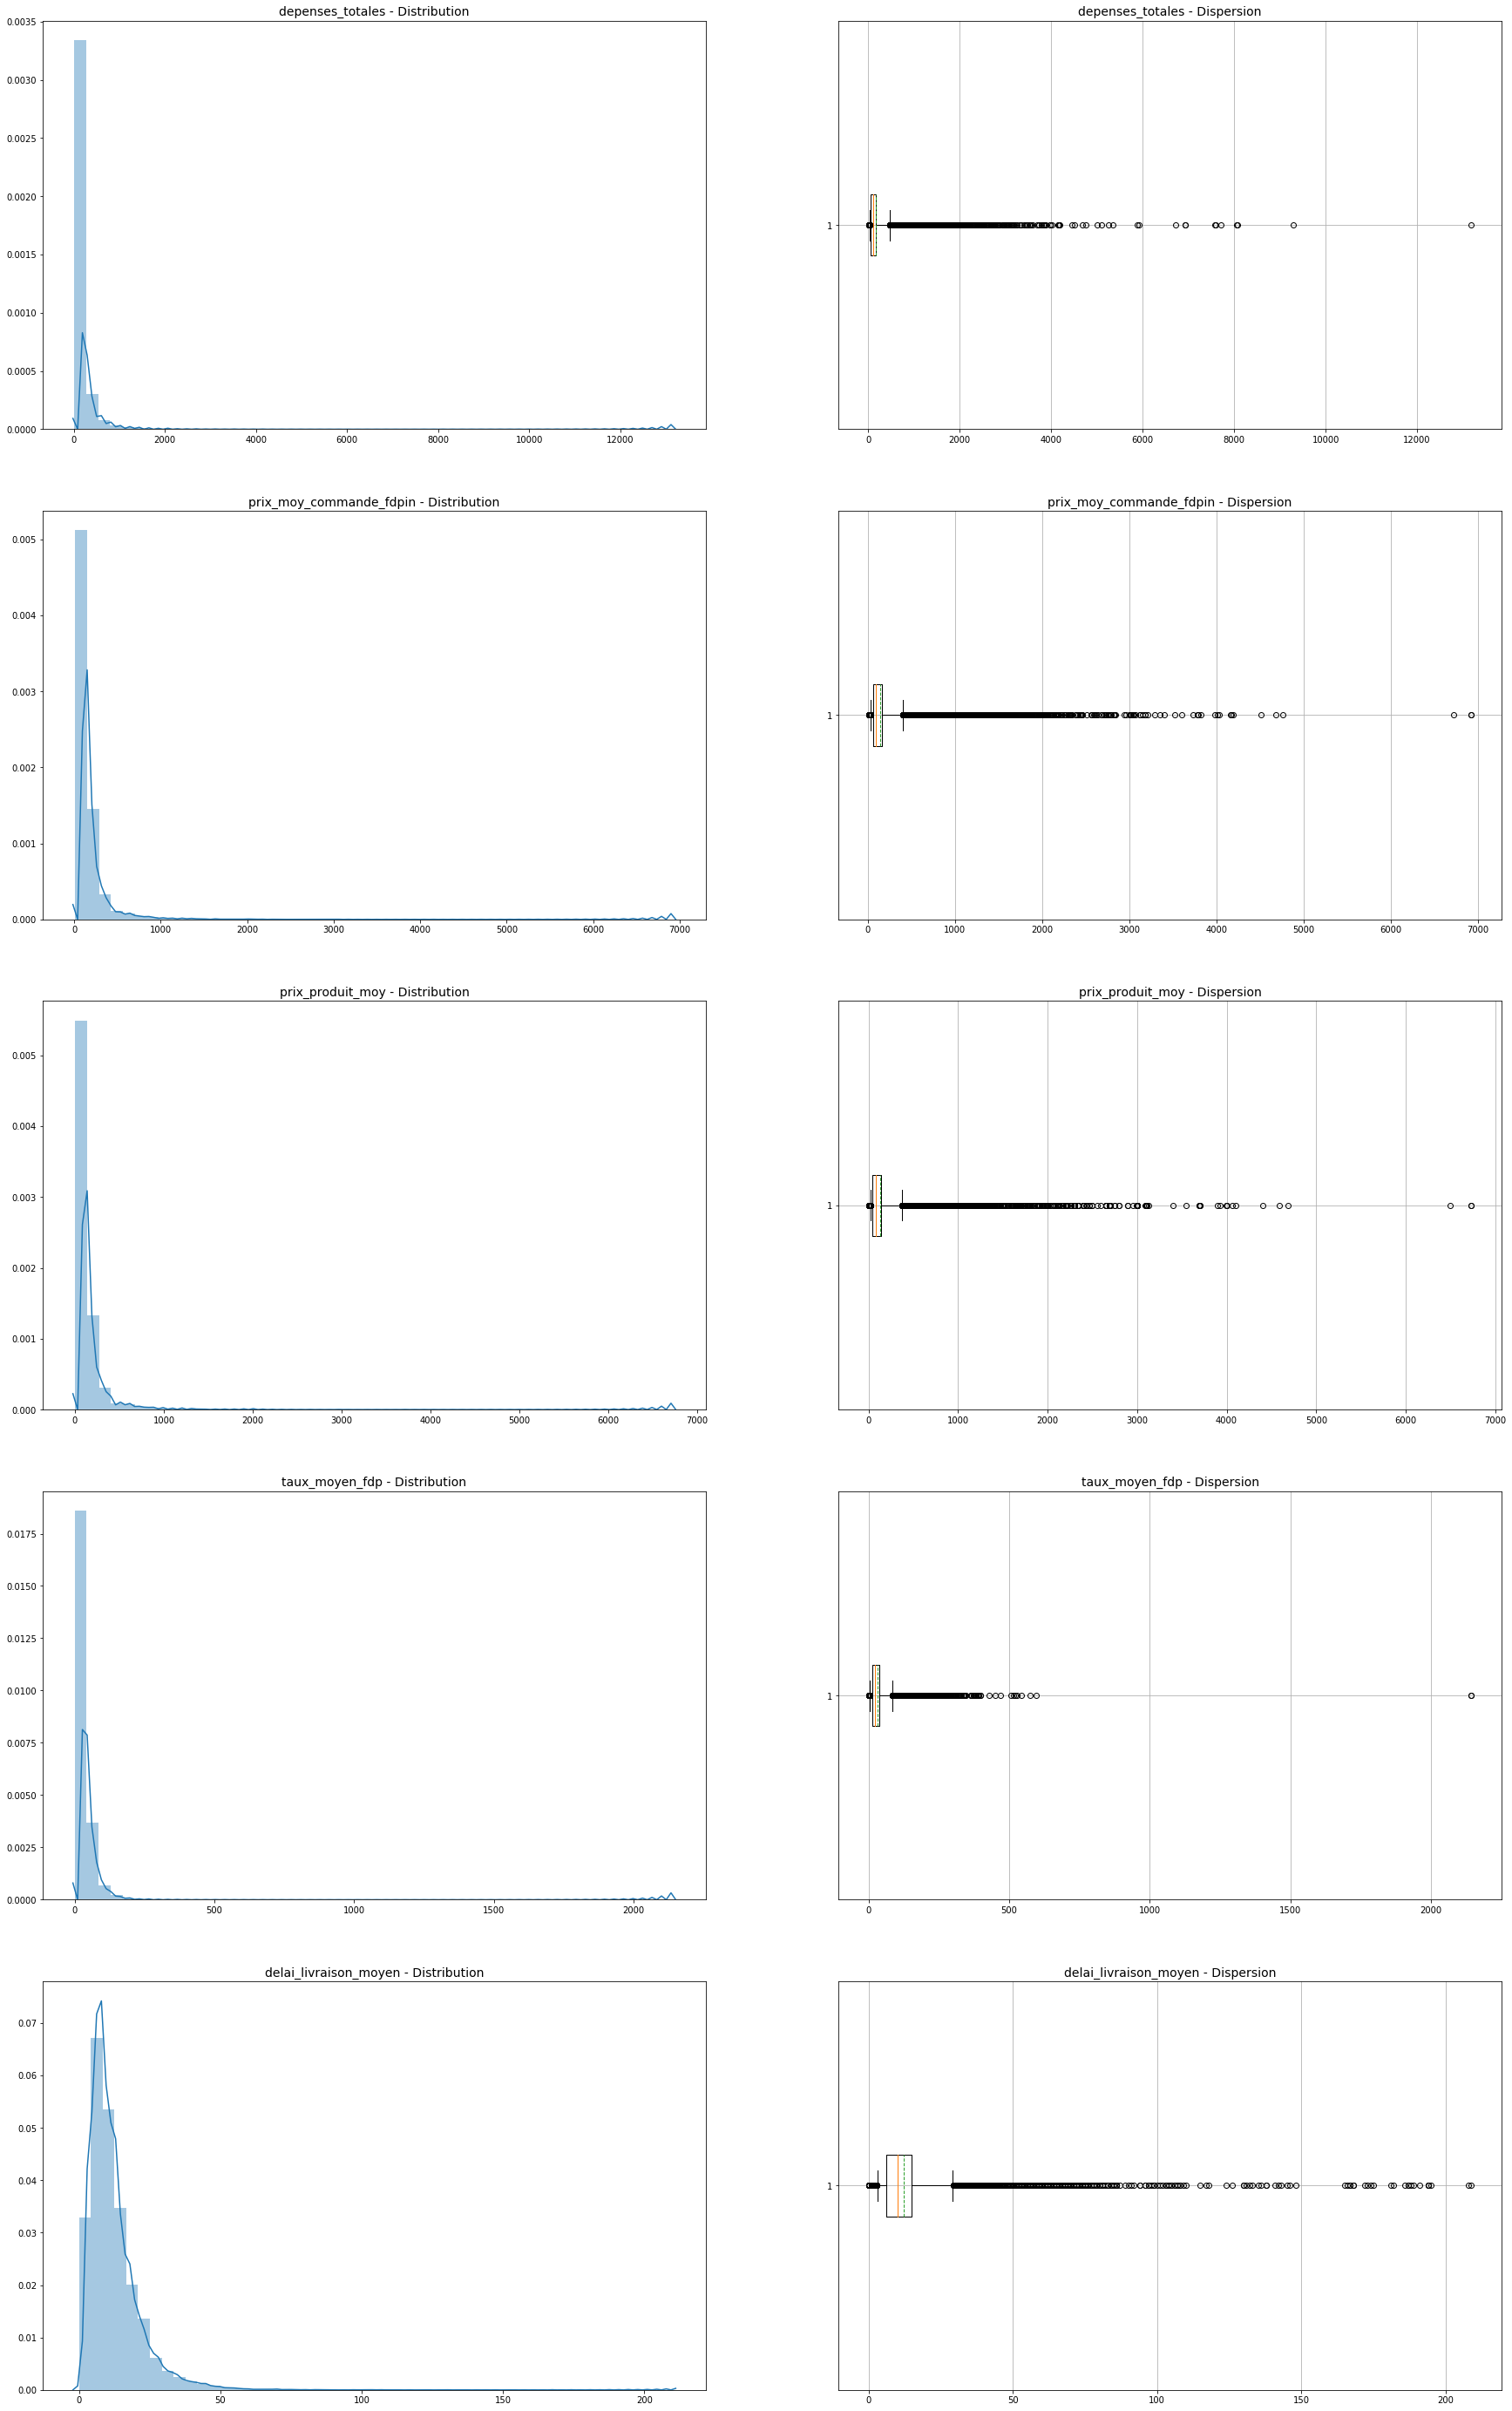

In [7]:
#Cette fonction boucle sur les colonnes de chaque indicateur
#Ce qui représente 10 graphiques

import scipy.stats as stats

lst_col = ["depenses_totales", "prix_moy_commande_fdpin", "prix_produit_moy", "taux_moyen_fdp", "delai_livraison_moyen"]

nbr_lignes = len(lst_col)
nbr_colonnes = 2
num_graph = 1

plt.subplots(figsize=(30, 50))


for i in data[lst_col]:
    
    #On code une condition pour ne traiter que les indicateurs désirés
    if data[i].dtypes != "object":

        if num_graph <= nbr_lignes * nbr_colonnes:

            mydata = data[i]

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
            sns.distplot(mydata, kde=True)
            plt.title(i + " - Distribution",size=14)
            plt.xlabel('')

            num_graph +=1

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
            plt.boxplot(mydata,whis=[5,95], meanline=True, showmeans=True, vert=False)
            plt.grid()
            plt.title(i + " - Dispersion",size=14)

            num_graph +=1

plt.show()

# <u>Fonctions</u>

Les cellules qui suivent sont des fonctions utiles

## <u>Preprocessing et modélisation</u>

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform

from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import statsmodels.formula.api as smf
import statsmodels.api as sm
    
import time

### Echantillonage

Pour un temps de traitement optimisé, nous n'allons travailler que sur 2000 individus choisis au hasard dans la base.

Une fois le travail d'analyse terminé avec les graphiques et les formats de résultats voulus, nous ferons tourner les algorithmes sur l'ensemble de la population.

In [9]:
def echantillonage(mydata):

    df_travail = mydata.sample(n=2000)

    return df_travail

### Normalisation des données

Nous allons utiliser une transformation quantile pour normaliser les données.

Cette méthode permet de supprimer toute notion d'unité de chaque feature en les ajustant par la moyenne de leur quantile.

In [10]:
def normalisation(mydata):

    X_norm = pd.DataFrame(quantile_transform(mydata, output_distribution="normal", copy=True), columns=mydata.columns, index = mydata.index)

    return X_norm

### <u>ACP</u>

Avant de faire tourner le modèle de clustering, nous mettons en place une ACP pour renforcer la qualité des performances.

In [11]:
def display_scree_plot(acp):
    scree = acp.explained_variance_ratio_*100
    #print(scree)
    #print("Le premier plan factoriel représente {} % de la variance totale.".format(round(scree[0] + scree[1],2)))
    #print("Le deuxième plan factoriel représente {} % de la variance totale.".format(round(scree[2] + scree[3],2)))
    #print("Le troisième plan factoriel représente {} % de la variance totale.".format(round(scree[4] + scree[5],2)))
    plt.figure(figsize=(8, 8))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [12]:
def acp(mydata):
    
    #n_comp = 6
    pca = PCA(0.99)     #n_components=n_comp)

    X_pca =  pd.DataFrame(pca.fit_transform(mydata))

    #On appelle la fonction qui trace la courbe des éboulis des valeurs propres
    display_scree_plot(pca)

    return X_pca

## <u>Itérations K-means</u>

On fait un gridsearch de l'algorithme K-means.

In [13]:
def kmeans(mydata):

    #Cette fonction permet de calculer le nombre de clusters le plus optimal pour notre analyse : le coefficient de silhouette

    silhouette = []
    dispersion = []

    result_clusters = []
    result_ninit = []
    result_type_init = []

    df_iter_kmeans = pd.DataFrame()

    n_clusters = range(3,11)
    nbr_init = [10,30,50,70]
    type_init = ["k-means++", "random"]

    #Nous allons tester le modèle entre 2 et 15 clusters
    for num_clusters in n_clusters:

        for init in nbr_init:

            for i in type_init:

                #On configure l'algorithme
                cls = MiniBatchKMeans(n_clusters=num_clusters, 
                                     n_init=init, 
                                     init=i,
                                     random_state=0
                                    )

                #On l'entraîne sur les données préparées
                cls.fit(mydata)

                #On enregistre les scores de coefficient de silhouette à chaque passage
                silh = metrics.silhouette_score(mydata, cls.labels_)
                disp = cls.inertia_

                silhouette.append(silh)
                dispersion.append(disp)
                result_clusters.append(num_clusters)
                result_ninit.append(init)
                result_type_init.append(i)

    df_iter_kmeans["coef_silh"] = silhouette
    df_iter_kmeans["dispersion"] = dispersion
    df_iter_kmeans["nbr_clusters"] = result_clusters
    df_iter_kmeans["n_init"] = result_ninit
    df_iter_kmeans["type_init"] = result_type_init
    
    return df_iter_kmeans

## <u>Itérations CAH</u>

On fait un gridsearch de l'algorithme CAH.

In [14]:
def cah(mydata):

    #Cette fonction permet de calculer le nombre de clusters le plus optimal pour notre analyse : le coefficient de silhouette

    silhouette = []
    #dispersion = []

    result_clusters = []
    result_linkage = []

    df_iter_cah = pd.DataFrame()

    n_clusters = range(3,11)
    linkage = ["ward", "complete", "average", "single"]

    #Nous allons tester le modèle entre 2 et 15 clusters
    for num_clusters in n_clusters:

        for link in linkage:

            #On configure l'algorithme
            cls_cah = AgglomerativeClustering(
                n_clusters=num_clusters, 
                linkage=link,
                affinity="euclidean")

            #On l'entraîne sur les données préparées
            cls_cah.fit(mydata)

            #On enregistre les scores de coefficient de silhouette à chaque passage
            silh = metrics.silhouette_score(mydata, cls_cah.labels_)
            #disp = cls_cah.inertia_

            silhouette.append(silh)
            #dispersion.append(disp)
            result_clusters.append(num_clusters)
            result_linkage.append(link)

    df_iter_cah["coef_silh"] = silhouette
    #df_iter_cah["dispersion"] = dispersion
    df_iter_cah["nbr_clusters"] = result_clusters
    #df_iter_cah["n_init"] = result_ninit
    df_iter_cah["linkage"] = result_linkage
    
    return df_iter_cah

## <u>Itérations DBSCAN</u>

On fait un gridsearch de l'algorithme DBSCAN.

Auparavant, on crée une fonction afin qui nous permet de déterminer la meilleure valeur d'Epsilon.

In [15]:
def recherche_epsilon(mydata):
    
    neigh = NearestNeighbors(n_neighbors=4)
    nbrs = neigh.fit(mydata)
    distances, indices = nbrs.kneighbors(mydata)

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

    plt.figure(figsize=(10,8))
    plt.plot(distances)
    plt.xlabel("Nbr clusters", size=14)
    plt.ylabel("Epsilon", size=14)
    plt.title("Evaluation Epsilon", size=14)

In [16]:
def dbscan(mydata, epsilon):

    #Cette fonction permet de calculer le nombre de clusters le plus optimal pour notre analyse : le coefficient de silhouette

    silhouette = []

    result_sample = []
    result_algorithm = []

    df_iter_dbscan = pd.DataFrame()

    samples = range(3,11)
    algorithm = ["auto", "ball_tree", "kd_tree", "brute"]

    #Nous allons tester le modèle entre 2 et 15 clusters
    for samp in samples:

        for algo in algorithm:

            #On configure l'algorithme
            cls_dbscan = DBSCAN(eps=epsilon,
                                min_samples=samp,
                                algorithm=algo,
                                metric="euclidean")

            #On l'entraîne sur les données préparées
            cls_dbscan.fit(mydata)

            #On enregistre les scores de coefficient de silhouette à chaque passage
            silh = metrics.silhouette_score(mydata, cls_dbscan.labels_)

            silhouette.append(silh)
            result_sample.append(samp)
            result_algorithm.append(algo)

    df_iter_dbscan["coef_silh"] = silhouette
    df_iter_dbscan["min_sample"] = result_sample
    df_iter_dbscan["algorithm"] = result_algorithm
    
    print(set(cls_dbscan.labels_))
    df_iter_dbscan["nbr_clusters"] = max(set(cls_dbscan.labels_))
    
    return df_iter_dbscan

## <u>Sélection meilleurs hyperparamètres</u>

In [17]:
def recherche_best_iter(mydata):

    #On affiche les paramètres de la meilleure itération
    best_iter = mydata.where(mydata["coef_silh"] == mydata["coef_silh"].max())
    best_iter.dropna(how="any", inplace=True)
    
    #On traite le cas où il y a plusieurs solutions possibles
    if best_iter.shape[0] > 0:
        best_iter = best_iter.iloc[0, :]
        
    print(best_iter)

    return best_iter

In [18]:
def recherche_best_iter_cah(mydata):

    #On affiche les paramètres de la meilleure itération
    best_iter = mydata.where(mydata["nbr_clusters"] == mydata["nbr_clusters"].max())
    best_iter.dropna(how="any", inplace=True)
    
    #On traite le cas où il y a plusieurs solutions possibles
    if best_iter.shape[0] > 0:
        best_iter = best_iter.iloc[0, :]
        
    print(best_iter)

    return best_iter

## <u>K-means</u>

On refait tourner le k-means avec les meilleurs hyperparamètres trouvés précédemment.

In [19]:
def best_kmeans(mydata, best):
    
    #On fait retourner le K-means avec la meilleure itération vue précédemment

    nbr_clusters = int(best["nbr_clusters"])
    ninit = int(best["n_init"])
    type_init = best["type_init"]

    cls_kmeans = MiniBatchKMeans(n_clusters=nbr_clusters, 
                                     n_init=ninit, 
                                     init=type_init,
                                     random_state=0
                                    )

    #On l'entraîne sur les données préparées
    cls_kmeans.fit(mydata)

    df_kmeans = pd.DataFrame()
    df_kmeans["labels"] = cls_kmeans.labels_
    df_kmeans["nbr_individus"] = 0
    df_kmeans = df_kmeans.groupby("labels", as_index=False).count()
        
    return [cls_kmeans.labels_, df_kmeans]

## <u>CAH</u>

On refait tourner le CAH avec les meilleurs hyperparamètres trouvés précédemment.

In [20]:
def best_cah(mydata, best):
    
    #On fait retourner le K-means avec la meilleure itération vue précédemment

    nbr_clusters = int(best["nbr_clusters"])
    linkage = best["linkage"]

    cls_cah = AgglomerativeClustering(
        n_clusters=nbr_clusters,
        linkage=linkage,
        affinity="euclidean")

    #On l'entraîne sur les données préparées
    cls_cah.fit(mydata)

    df_cah = pd.DataFrame()
    df_cah["labels"] = cls_cah.labels_
    df_cah["nbr_individus"] = 0
    df_cah = df_cah.groupby("labels", as_index=False).count()
    print(df_cah)
    
    return [cls_cah.labels_, df_cah]

## <u>DBSCAN</u>

On refait tourner le DBSCAN avec les meilleurs hyperparamètres trouvés précédemment.

In [21]:
def best_dbscan(mydata, best, epsilon):

    min_sample = int(best["min_sample"])
    algorithm = best["algorithm"]

    cls_dbscan = DBSCAN(eps=epsilon,
                        min_samples=min_sample,
                        algorithm=algorithm,
                        metric="euclidean")

    #On l'entraîne sur les données préparées
    cls_dbscan.fit(mydata)

    core_samples_mask = np.zeros_like(cls_dbscan.labels_, dtype=bool)
    core_samples_mask[cls_dbscan.core_sample_indices_] = True

    labels = cls_dbscan.labels_

    df_dbscan = pd.DataFrame()
    df_dbscan["labels"] = labels
    df_dbscan["nbr_individus"] = 0
    df_dbscan = df_dbscan.groupby("labels", as_index=False).count()

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    #print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    #print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    #print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    #print("Adjusted Rand Index: %0.3f"
    #      % metrics.adjusted_rand_score(labels_true, labels))
    #print("Adjusted Mutual Information: %0.3f"
    #      % metrics.adjusted_mutual_info_score(labels_true, labels,
    #                                           average_method='arithmetic'))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(data_prepared_dbscan, labels))
    
    return [cls_dbscan.labels_, df_dbscan]

## <u> Affichage résultats itérations algorithmes</u>

Recherche du nombre optimal de clusters par rapport au coefficient de silhouette. Le plus élevé est le meilleur.

Affichage de la compacité des clusters avec la méthode inertia_ des algorithmes. Le plus petit nombre est le meilleur.

In [22]:
def results_iterations_kmeans(mydata):

    #On affiche les scores

    df_coef_silh = mydata.groupby("nbr_clusters", as_index=False)["coef_silh"].max()
    df_dispersion = mydata.groupby("nbr_clusters", as_index=False)["dispersion"].min()

    plt.subplots(figsize=(25,10))

    plt.subplot(1,2,1)

    plt.plot(df_coef_silh["nbr_clusters"], df_coef_silh["coef_silh"], marker="o")
    plt.xlabel("Nbr de clusters", size=14)
    plt.ylabel("Coefficient de silhouette", size=14)
    plt.title("Variation coefficient de silhouette", size=14)
    plt.grid()

    plt.subplot(1,2,2)

    plt.plot(df_dispersion["nbr_clusters"], df_dispersion["dispersion"], marker="o")
    plt.xlabel("Nbr de clusters", size=14)
    plt.ylabel("Compacité clusters", size=14)
    plt.title("Variation de la compacité des clusters", size=14)
    plt.grid()


In [23]:
def results_iterations_cah(mydata):

    #On affiche les scores

    df_coef_silh = mydata.groupby("nbr_clusters", as_index=False)["coef_silh"].max()

    plt.figure(figsize=(13,10))

    plt.plot(df_coef_silh["nbr_clusters"], df_coef_silh["coef_silh"], marker="o")
    plt.xlabel("Nbr de clusters", size=14)
    plt.ylabel("Coefficient de silhouette", size=14)
    plt.title("Variation coefficient de silhouette", size=14)
    plt.grid()

## <u>Homogénéïté des clusters</u>

On affiche le nombre d'individus par clusters afin de vérifier l'homogénéïté des clusters.

Le but est de vérifier qu'il n'y est pas de cluster qui contienne la quasi totalité de la population, et d'autres contenant des individus isolés.

In [24]:
def homogeneite_clusters(mydata):

    print(mydata)
    plt.figure(figsize=(10,10))

    plt.bar(mydata["labels"], height=mydata["nbr_individus"])
    plt.xlabel("Nbr de clusters", size=14)
    plt.ylabel("Nbr individus", size=14)
    plt.title("Classement des individus", size=14)

## <u>Affichage TSNE pour visualisation clusters</u>

In [25]:
def affich_tsne(mydata):
                
    time_start= time.time()

    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    
    tsne_results = tsne.fit_transform(mydata)
    
    print("TSNE terminée. Temps écoulé {} seconds.".format(time.time() - time_start))

    df_results = pd.DataFrame(tsne_results, columns=["tsne_2d_one", "tsne_2d_two"])
    
    #df_results["labels"] = labels #cls_kmeans.labels_
        
    plt.figure(figsize=(25,12))
    
    sns.scatterplot(
        x=df_results["tsne_2d_one"],
        y=df_results["tsne_2d_two"],
        hue=mydata["labels"],
        palette=sns.color_palette("hls", n_colors = len(mydata["labels"].unique())),
        data=df_results,
        legend="full",
        #alpha=0.3
    )
    

# <u>Modélisation</u>

Nous allons implémenter plusieurs algorithmes successivement et choisir celui qui présente les résultats les plus homogènes.

In [26]:
data.drop(["Unnamed: 0", "customer_unique_id", "nbr_commandes"], axis=1, inplace=True)

## <u>K-MEANS</u>

On fait tourner la version minibatch de kmeans qui est plus rapide pour une performance à peu près égale.

Echantillonage
Normalisation des données
Création ACP


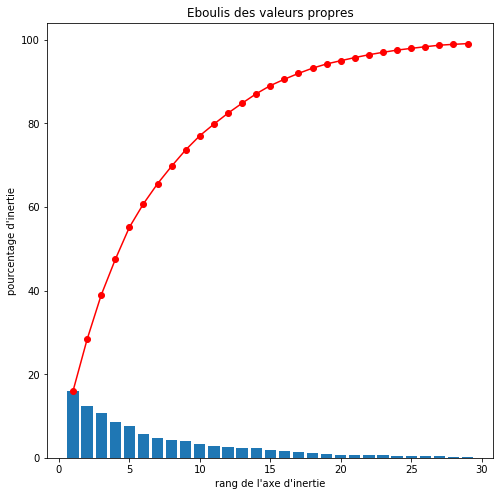

Recherche meilleur paramétrage sur GridSearch
Sélection meilleure itération
coef_silh        0.213504
dispersion         372004
nbr_clusters            3
n_init                 10
type_init       k-means++
Name: 0, dtype: object
Kmeans en cours avec les meilleurs hyperparamètres
Homogénéité clusters
   labels  nbr_individus
0       0            355
1       1           1216
2       2            429
TSNE - Kmeans
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.003s...
[t-SNE] Computed neighbors for 2000 samples in 0.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 4.884376
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.773140
[t-SNE] KL divergence after 300 iterations: 0.691912
TSNE terminée. Temps écoulé 3.7216548919677734 seconds.
Wall time: 11.9 s


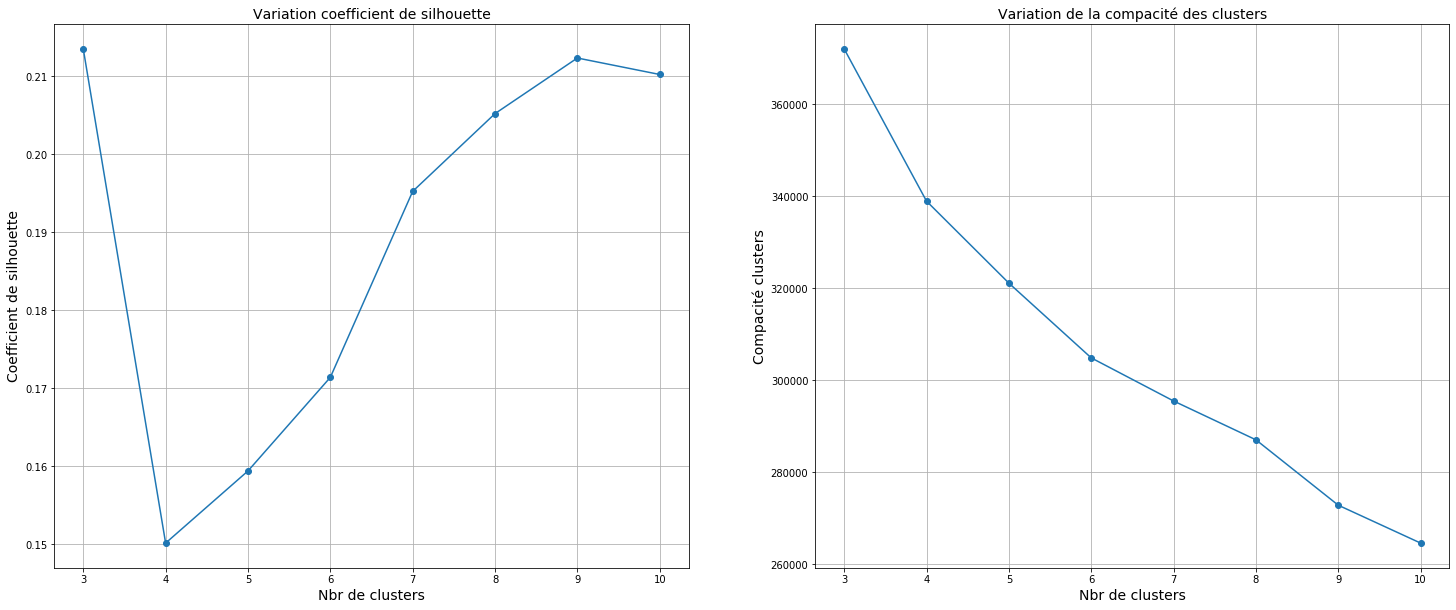

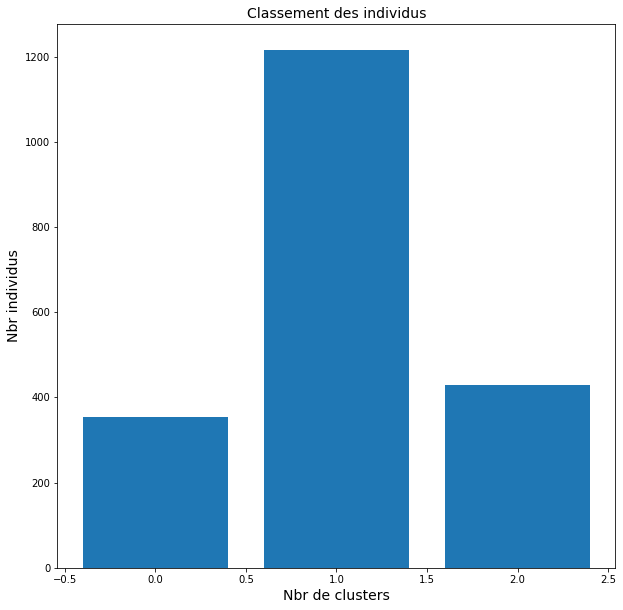

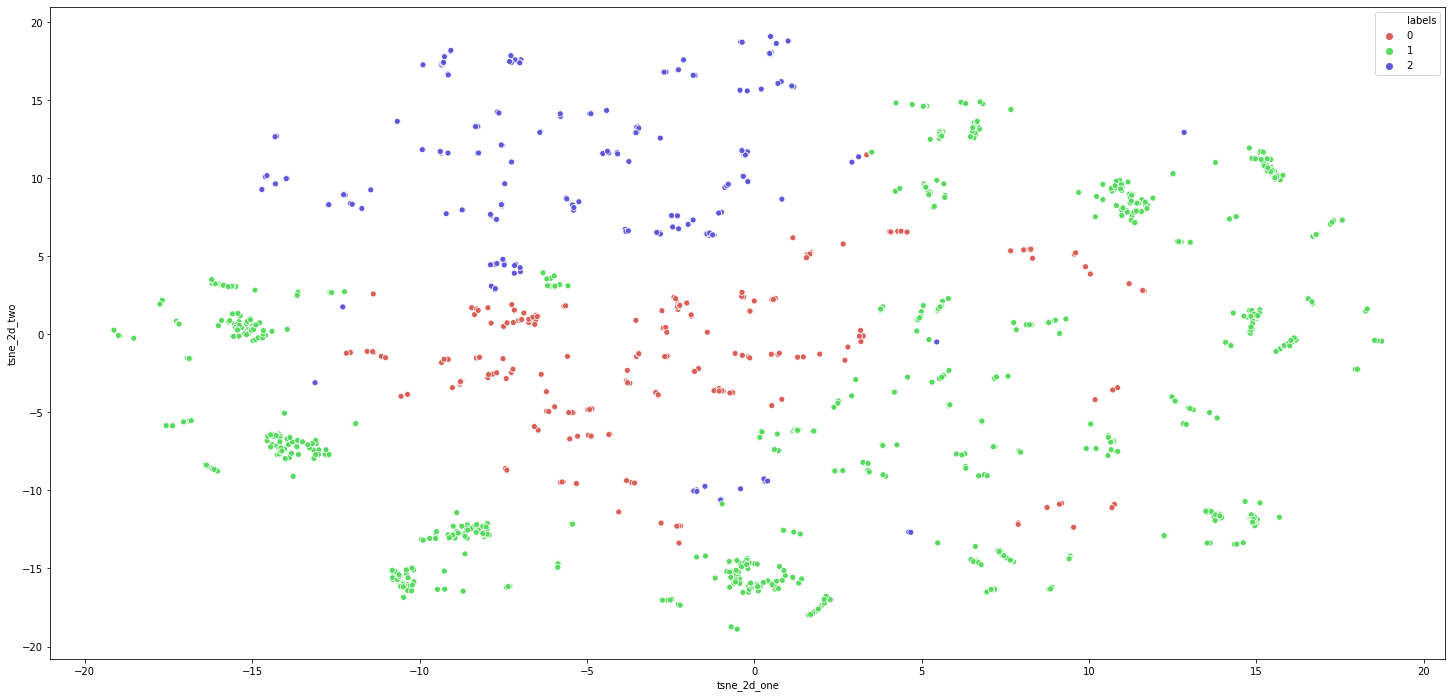

In [27]:
%%time
#Construction du pipeline de modélisation

data_clustering = data.copy()
#On commence par echantilloner pour le travail d'étude. Gain de temps
print("Echantillonage")
data_clustering = echantillonage(data)

#On normalise les données
print("Normalisation des données")
data_prepared = normalisation(data_clustering)

#On fait une ACP
print("Création ACP")
data_prepared = acp(data_prepared)

############## K-MEANS ##################
#On fait un gridsearch sur le kmeans
print("Recherche meilleur paramétrage sur GridSearch")
df_iter_kmeans = kmeans(data_prepared)

#Affichage des résultats des itérations
print("Sélection meilleure itération")
results_iterations_kmeans(df_iter_kmeans)

#On recherche la meilleure itération
df_best_kmeans = recherche_best_iter(df_iter_kmeans)

#On refait tourner l'algorithme du Kmeans avec la meilleure itération
print("Kmeans en cours avec les meilleurs hyperparamètres")
data_clustering["labels"] = best_kmeans(data_prepared, df_best_kmeans)[0]
data_prepared["labels"] = best_kmeans(data_prepared, df_best_kmeans)[0]
df_results_kmeans = best_kmeans(data_prepared, df_best_kmeans)[1]

#On affiche l'aspect de l'homogénéité des clusters
print("Homogénéité clusters")
homogeneite_clusters(df_results_kmeans)

#On affiche la TSNE
print("TSNE - Kmeans")
affich_tsne(data_prepared)

## <u>CAH - Clustering Ascendant Hierarchique</u>

Echantillonage
Normalisation des données
Création ACP


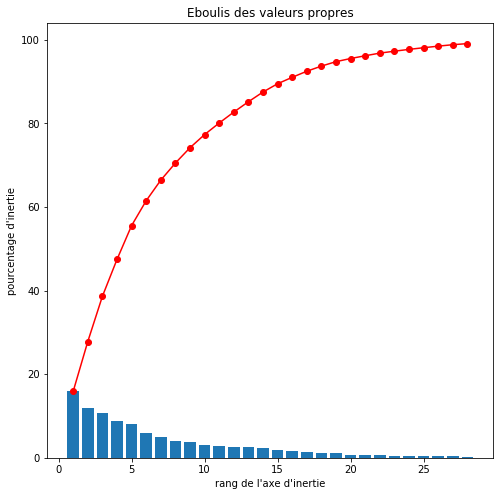

Recherche meilleur paramétrage sur GridSearch
Sélection meilleure itération
coef_silh       0.227858
nbr_clusters          10
linkage             ward
Name: 28, dtype: object
CAH en cours avec les meilleurs hyperparamètres
   labels  nbr_individus
0       0            376
1       1            272
2       2            287
3       3            252
4       4            251
5       5            228
6       6             48
7       7            149
8       8             94
9       9             43
   labels  nbr_individus
0       0            376
1       1            272
2       2            287
3       3            252
4       4            251
5       5            228
6       6             48
7       7            149
8       8             94
9       9             43
   labels  nbr_individus
0       0            376
1       1            287
2       2            272
3       3            252
4       4            251
5       5            228
6       6            149
7       7             48
8 

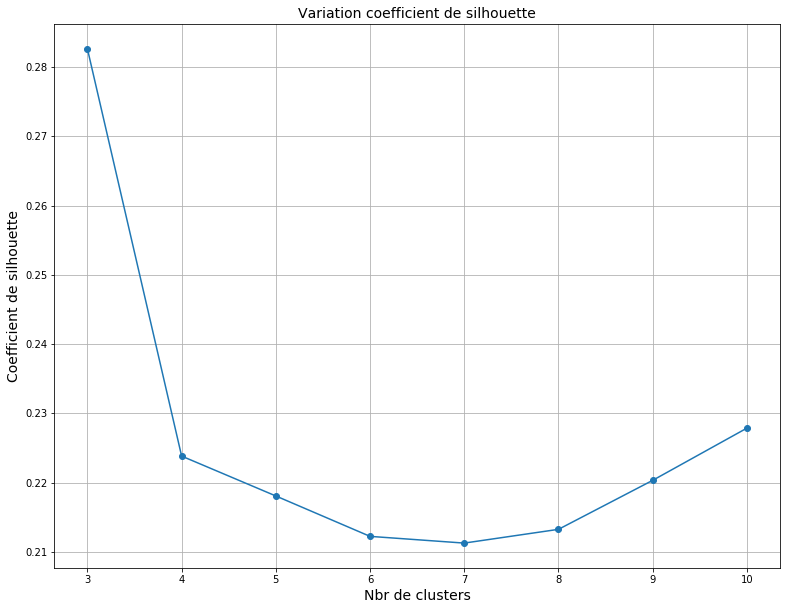

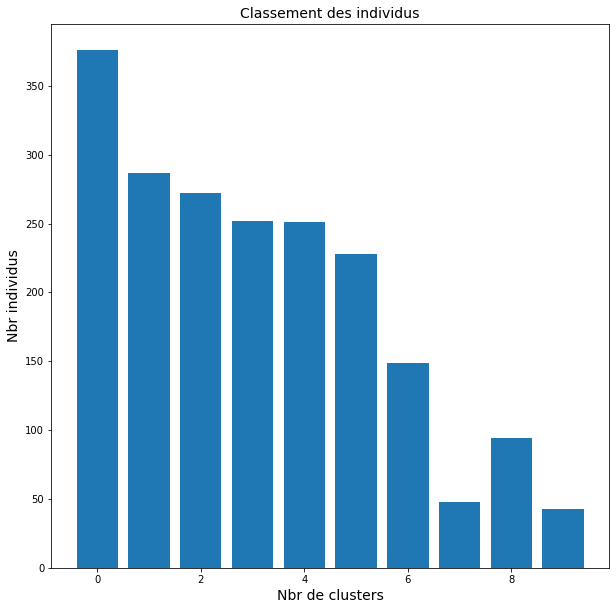

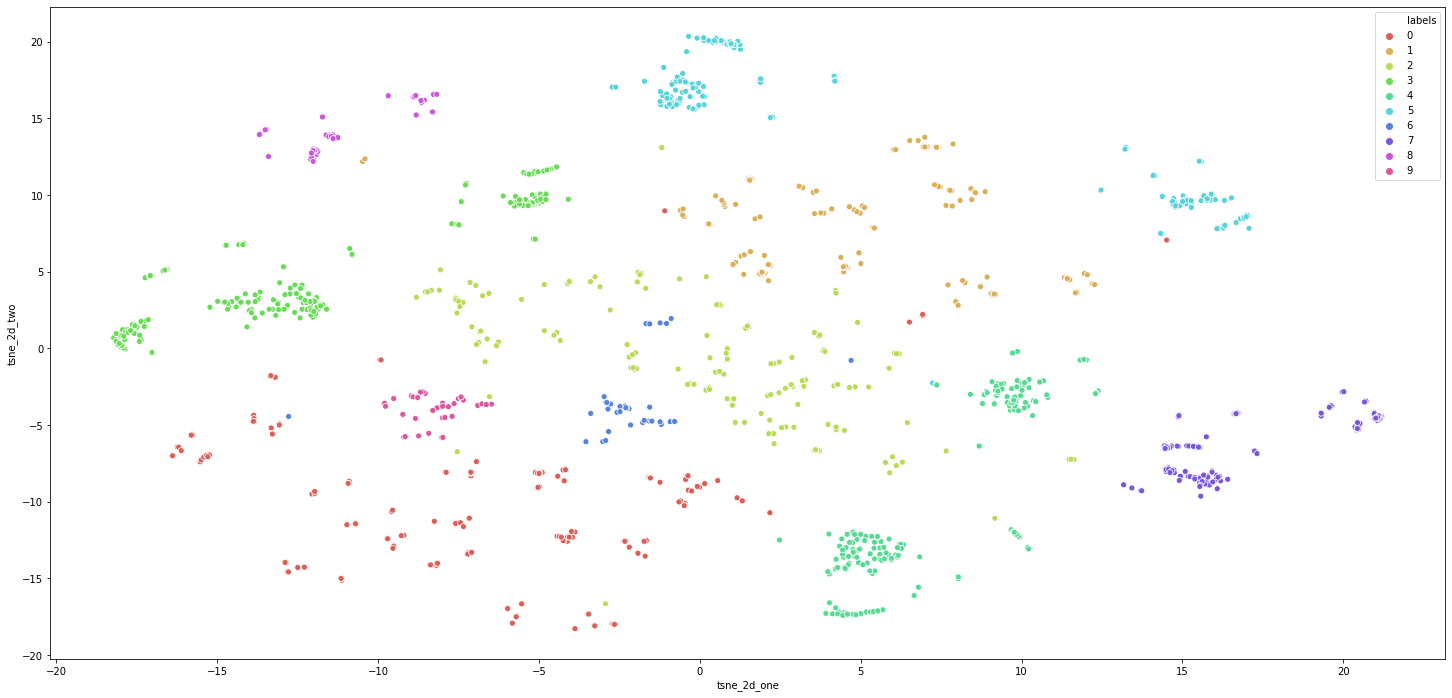

In [28]:
%%time
#Construction du pipeline de modélisation

data_clustering_cah = data.copy()

#On commence par echantilloner pour le travail d'étude. Gain de temps
print("Echantillonage")
data_clustering_cah = echantillonage(data)
    
#On normalise les données
print("Normalisation des données")
data_prepared_cah = normalisation(data_clustering_cah)

#On fait une ACP
print("Création ACP")
data_prepared_cah = acp(data_prepared_cah)

############## K-MEANS ##################
#On fait un gridsearch sur le kmeans
print("Recherche meilleur paramétrage sur GridSearch")
df_iter_cah = cah(data_prepared_cah)

#Affichage des résultats des itérations
print("Sélection meilleure itération")
results_iterations_cah(df_iter_cah)

#On recherche la meilleure itération
df_best_cah = recherche_best_iter_cah(df_iter_cah)

#On refait tourner l'algorithme du Kmeans avec la meilleure itération
print("CAH en cours avec les meilleurs hyperparamètres")
data_clustering_cah["labels"] = best_cah(data_prepared_cah, df_best_cah)[0]
data_prepared_cah["labels"] = best_cah(data_prepared_cah, df_best_cah)[0]
df_results_cah = best_cah(data_prepared_cah, df_best_cah)[1]

#On affiche l'aspect de l'homogénéité des clusters
print("Homogénéité clusters")
homogeneite_clusters(df_results_cah)

#On affiche la TSNE
print("TSNE - CAH")
affich_tsne(data_prepared_cah)

## <u>DBSCAN</u>

Echantillonage
Normalisation des données
Création ACP


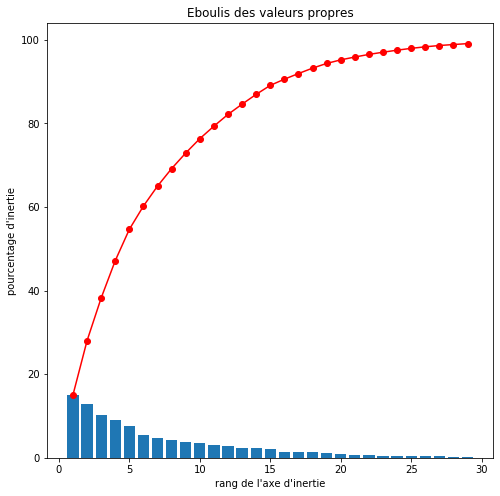

Recherche meilleur paramétrage sur GridSearch
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, -1}
Sélection meilleure itération
coef_silh       0.302747
min_sample             3
algorithm           auto
nbr_clusters          33
Name: 0, dtype: object
Estimated number of clusters: 74
Estimated number of noise points: 236
Silhouette Coefficient: 0.303
Estimated number of clusters: 74
Estimated number of noise points: 236
Silhouette Coefficient: 0.405
Homogénéité clusters
    labels  nbr_individus
0       -1            236
1        0              3
2        1             71
3        2             13
4        3            129
..     ...            ...
70      69              3
71      70              7
72      71              3
73      72              3
74      73              5

[75 rows x 2 columns]
TSNE - DBSCAN
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Compu

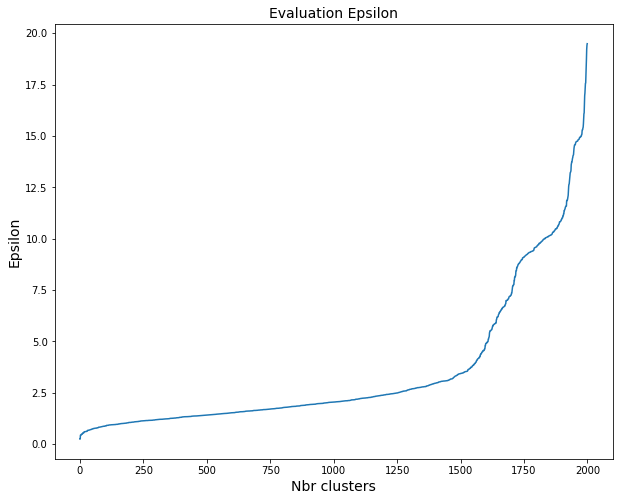

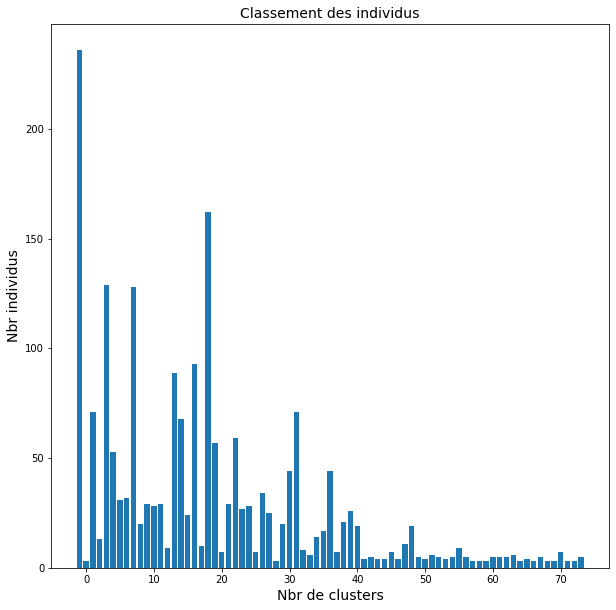

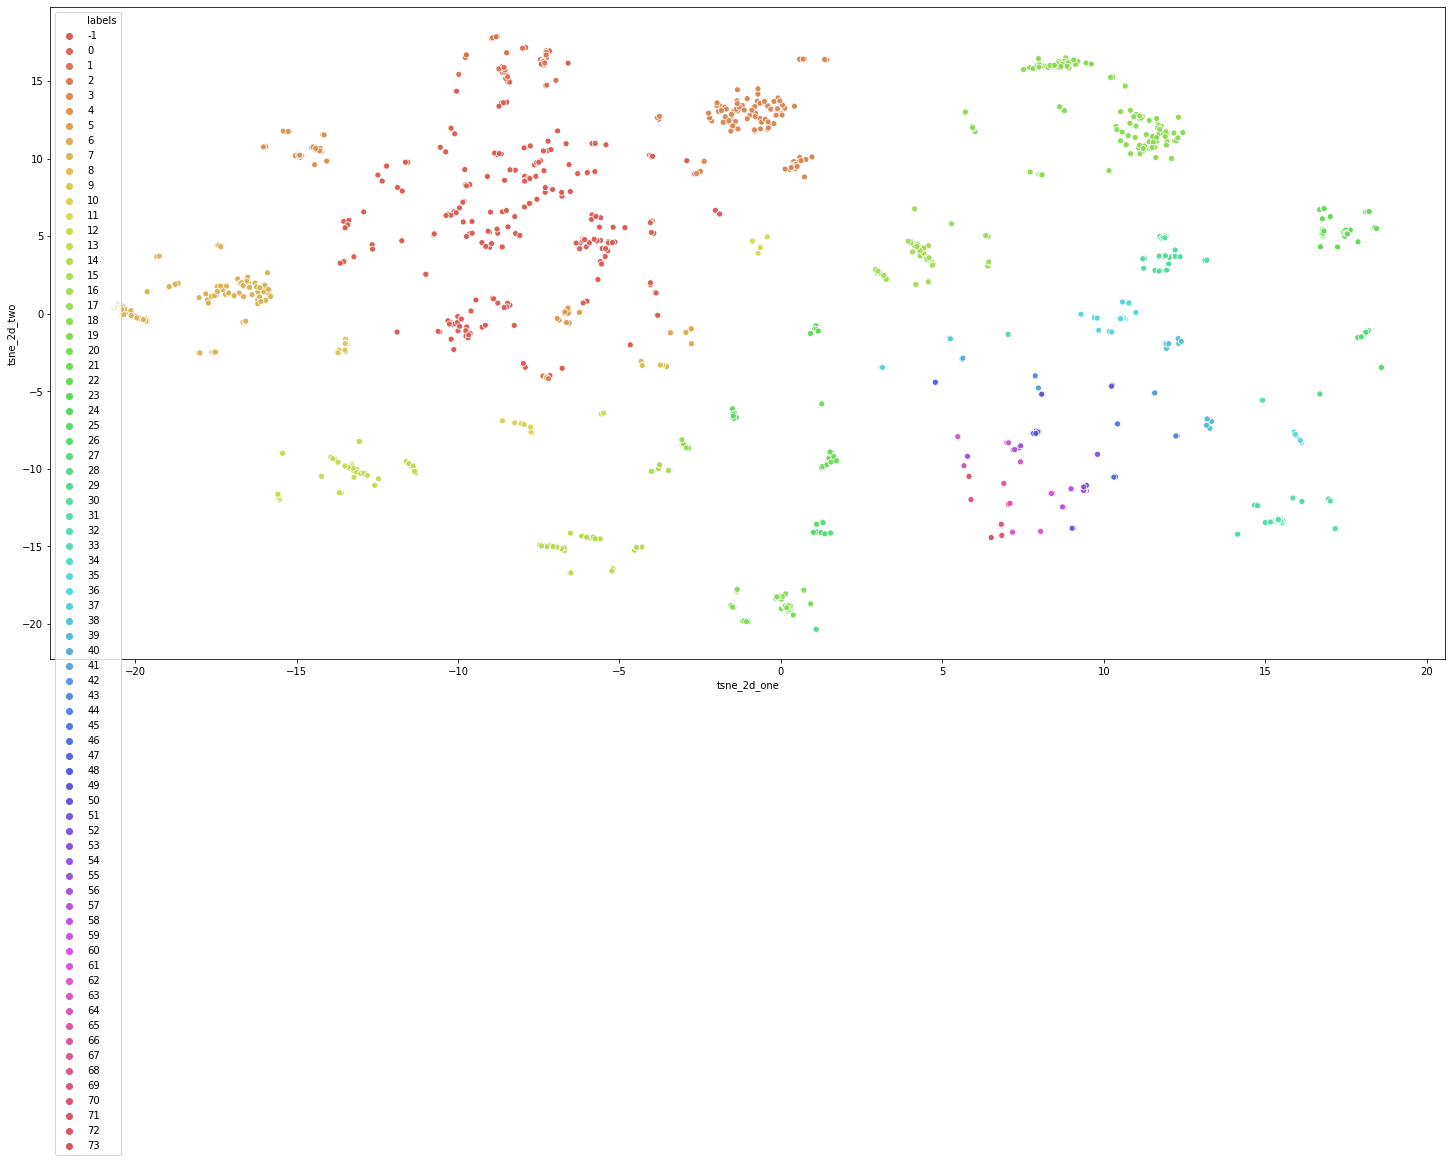

In [29]:
%%time
#Construction du pipeline de modélisation

data_clustering_dbscan = data.copy()

#On commence par echantilloner pour le travail d'étude. Gain de temps
print("Echantillonage")
data_clustering_dbscan = echantillonage(data)
    
#On normalise les données
print("Normalisation des données")
data_prepared_dbscan = normalisation(data_clustering_dbscan)

#On fait une ACP
print("Création ACP")
data_prepared_dbscan = acp(data_prepared_dbscan)

#On recerche la meilleure valeur d'epsilon
recherche_epsilon(data_prepared_dbscan)

#On choisit la valeur d'Epsilon par rapport au graphique de sortie de la fonction précédente
epsilon = 10

#On lance un gridsearch sur le dbscan
print("Recherche meilleur paramétrage sur GridSearch")
df_iter_dbscan = dbscan(data_prepared_dbscan, epsilon)

#On récupère la meilleure iteration
print("Sélection meilleure itération")
df_best_dbscan = recherche_best_iter(df_iter_dbscan)

#On fait tourner la meilleure itération
data_prepared_dbscan["labels"] = best_dbscan(data_prepared_dbscan, df_best_dbscan, epsilon)[0]
df_results_dbscan = best_dbscan(data_prepared_dbscan, df_best_dbscan, epsilon)[1]

#On affiche l'aspect de l'homogénéité des clusters
print("Homogénéité clusters")
homogeneite_clusters(df_results_dbscan)

#On affiche la TSNE
print("TSNE - DBSCAN")
affich_tsne(data_prepared_dbscan)

## <u>Fonctions analyses résultats</u>

Ces fonctions nous permettrons d'analyser les profils types de chaque clusters.

## <u>Calcul ANOVA</u>

Recherche des variables significatives pour chaque cluster

In [30]:
# %%flake8  # checking PEP8 compliance

def get_significant_features(dataframe, categorical_labels, threshold=0.05):
    """This function proceed to a "1 variable - ANOVA" test
    for each feature in the dataframe and returns a list
    of p-values for the Fischer statistic."""
    
    # categorical feature (labels) to test against
    clusters_labels = categorical_labels

    # initialize pd.DataFrame for results
    results_anova = pd.DataFrame()

    # create a pd.DataFrame with features and labels
    data_anova = pd.concat([dataframe, clusters_labels], axis=1)

    # iterating of features
    for feature_name in dataframe.columns:
        
        # create the model for the "1-variable ANOVA"
        formula = feature_name + "~" + "labels"
        anova_feature = smf.ols(formula, data=data_anova).fit()

        # get the p-value for the test statistic (Fisher)
        p_value = sm.stats.anova_lm(anova_feature, typ=2)['PR(>F)'][0]

        # Save the p-value for the test in a pd.DataFrame
        results_anova.loc[feature_name, 'p-value'] = p_value
        results_anova.loc[feature_name, 'significant'] = (p_value < threshold)

    # return pd.DataFrame of results
    return results_anova

## <u>Analyses catégories</u>

On va analyser les différentes catégories du dataframe. Il y a deux types de catégories :

 - Les taux, comme les taux de produits achetés ou les taux de paiement par CB par exemple. Nous aggregerons ces données par la moyenne.
 - Les valeurs, comme les tranches de dépeses clients ou le nombre de commandes effectuées.

In [31]:
def analyse_categories_moyenne(df, lbl, mot_cle, titre):
    
    df_analyse = df.loc[:,df.columns.str.contains(mot_cle)]
    df_analyse["label"] = lbl
    df_analyse = df_analyse.groupby("label", as_index=False).mean()
    df_analyse.drop("label", axis=1, inplace=True)
    df_analyse = df_analyse.drop(df_analyse.columns[df_analyse.iloc[0,:]==0], axis=1)
        
    sizes = df_analyse.values
    labels = df_analyse.columns
    explode = [0.1] * df_analyse.shape[1]
    
    plt.title(titre + " cluster n°" + str(lbl), size=14)
    
    plt.pie(sizes,
            explode=explode, 
            #labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90
           )
    
    plt.legend(labels,
               title="Légende",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1),
               fontsize=12)


In [32]:
def analyse_categories_somme(df, lbl, mot_cle, titre):
    
    df_analyse = df.loc[:,df.columns.str.contains(mot_cle)]
    df_analyse["label"] = lbl
    df_analyse = df_analyse.groupby("label", as_index=False).sum()
    df_analyse.drop("label", axis=1, inplace=True)
    df_analyse = df_analyse.drop(df_analyse.columns[df_analyse.iloc[0,:]==0], axis=1)
        
    sizes = df_analyse.values
    labels = df_analyse.columns
    explode = [0.1] * df_analyse.shape[1]
    
    plt.title(titre + " cluster n°" + str(lbl), size=14)
    
    plt.pie(sizes,
            explode=explode, 
            #labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90
           )
    
    plt.legend(labels,
               title="Légende",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1),
               fontsize=12)


## <u>Analyses distributions</u>

Pour certaines varibales, nous analyserons la distribution.

In [33]:
from matplotlib.offsetbox import AnchoredText

def analyse_distributions(df, col):
   
    sns.distplot(df[col], kde=True)
    plt.title(col, size=14)
    plt.xlabel('')
    
    plt.annotate("Valeur min : " + str(round(df[col].min(),2)), size=14, xy=(0.67, 0.95), xycoords='axes fraction')
    plt.annotate("Valeur max : " + str(round(df[col].max(),2)), size=14, xy=(0.67, 0.9), xycoords='axes fraction')
    plt.annotate("Valeur moyenne : " + str(round(df[col].mean(),2)), size=14, xy=(0.67, 0.85), xycoords='axes fraction')
    plt.annotate("Ecart-type : " + str(round(df[col].std(),2)), size=14, xy=(0.67, 0.8), xycoords='axes fraction')
    
    ecart_type_pos = round(df[col].mean() + df[col].std(), 2)
    ecart_type_neg = round(df[col].mean() - df[col].std(), 2)
    
    plt.axvline(x=ecart_type_pos,color='green',linestyle='--')
    plt.axvline(x=ecart_type_neg,color='green',linestyle='--')
    plt.axvline(x=df[col].mean(),color='red',linestyle='--')

(355, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1768: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\bas

Cluster n° [1]
47 variables significatives pour expliquer le cluster sur 60 .


Variables significatives
0                   juste_1_commandes
1                    de_2_4_commandes
2                   anciennete_client
3              date_derniere_commande
4                     geolocation_lat
5                     geolocation_lng
6                 region_centre_ouest
7                     region_nord_est
8                         region_nord
9                      region_sud_est
10                         region_sud
11                   depenses_totales
12            prix_moy_commande_fdpin
13        ecart_type_commande_moyenne
14            prix_max_commande_fdpin
15            prix_min_commande_fdpin
16                   prix_produit_moy
17           ecart_type_produit_moyen
18                   prix_produit_max
19                   prix_produit_min
20                     taux_moyen_fdp
21          ecart_type_taux_moyen_fdp
22               payment_installments
23              delai_livraison_moyen
24                delai_livraison_min
25                delai_livraison_max
26             review_comment_message
27       taux_paiement_Carte_bancaire
28      taux_paiement_bons_reductions
29        taux_produit_Cuisine_Maison
30  taux_produit_Conciergerie_Hygiene
31   taux_produit_Informatique_Bureau
32         taux_produit_Sport_Loisirs
33          taux_produit_Electronique
34                taux_produit_Divers
35          taux_produit_Construction
36                  taux_produit_Mode
37            nbr_paiements_effectues
38               nbr_produits_achetes
39                 de_200_400_dollars
40                 de_400_600_dollars
41                 de_600_800_dollars
42                de_800_1000_dollars
43               de_1000_1200_dollars
44               de_1200_1400_dollars
45               de_1600_1800_dollars
46               plus_de_2000_dollars

(1216, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarn

Cluster n° [2]
42 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0                   juste_1_commandes
1                    de_2_4_commandes
2                   anciennete_client
3              date_derniere_commande
4                     geolocation_lat
5                     geolocation_lng
6                 region_centre_ouest
7                     region_nord_est
8                         region_nord
9                      region_sud_est
10                         region_sud
11                   depenses_totales
12            prix_moy_commande_fdpin
13        ecart_type_commande_moyenne
14            prix_max_commande_fdpin
15            prix_min_commande_fdpin
16                   prix_produit_moy
17           ecart_type_produit_moyen
18                   prix_produit_max
19                   prix_produit_min
20                     taux_moyen_fdp
21          ecart_type_taux_moyen_fdp
22               payment_installments
23              delai_livraison_moyen
24                delai_livraison_min
25                delai_livraison_max
26             review_comment_message
27       taux_paiement_Carte_bancaire
28      taux_paiement_bons_reductions
29        taux_produit_Cuisine_Maison
30  taux_produit_Conciergerie_Hygiene
31   taux_produit_Informatique_Bureau
32         taux_produit_Sport_Loisirs
33          taux_produit_Electronique
34                taux_produit_Divers
35              taux_produit_Epicerie
36          taux_produit_Construction
37                  taux_produit_Mode
38                taux_produit_Livres
39            nbr_paiements_effectues
40               nbr_produits_achetes
41                   de_0_200_dollars

(429, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [3]
45 variables significatives pour expliquer le cluster sur 60 .


Variables significatives
0                   juste_1_commandes
1                    de_2_4_commandes
2                   anciennete_client
3              date_derniere_commande
4                     geolocation_lat
5                     geolocation_lng
6                 region_centre_ouest
7                     region_nord_est
8                         region_nord
9                      region_sud_est
10                         region_sud
11                   depenses_totales
12            prix_moy_commande_fdpin
13        ecart_type_commande_moyenne
14            prix_max_commande_fdpin
15            prix_min_commande_fdpin
16                   prix_produit_moy
17           ecart_type_produit_moyen
18                   prix_produit_max
19                   prix_produit_min
20                     taux_moyen_fdp
21          ecart_type_taux_moyen_fdp
22               payment_installments
23              delai_livraison_moyen
24                delai_livraison_min
25                delai_livraison_max
26             review_comment_message
27              taux_paiement_liquide
28      taux_paiement_bons_reductions
29        taux_produit_Cuisine_Maison
30  taux_produit_Conciergerie_Hygiene
31   taux_produit_Informatique_Bureau
32         taux_produit_Sport_Loisirs
33          taux_produit_Electronique
34                taux_produit_Divers
35              taux_produit_Epicerie
36          taux_produit_Construction
37                  taux_produit_Mode
38                taux_produit_Livres
39            nbr_paiements_effectues
40               nbr_produits_achetes
41                   de_0_200_dollars
42                 de_200_400_dollars
43                 de_400_600_dollars
44                 de_600_800_dollars

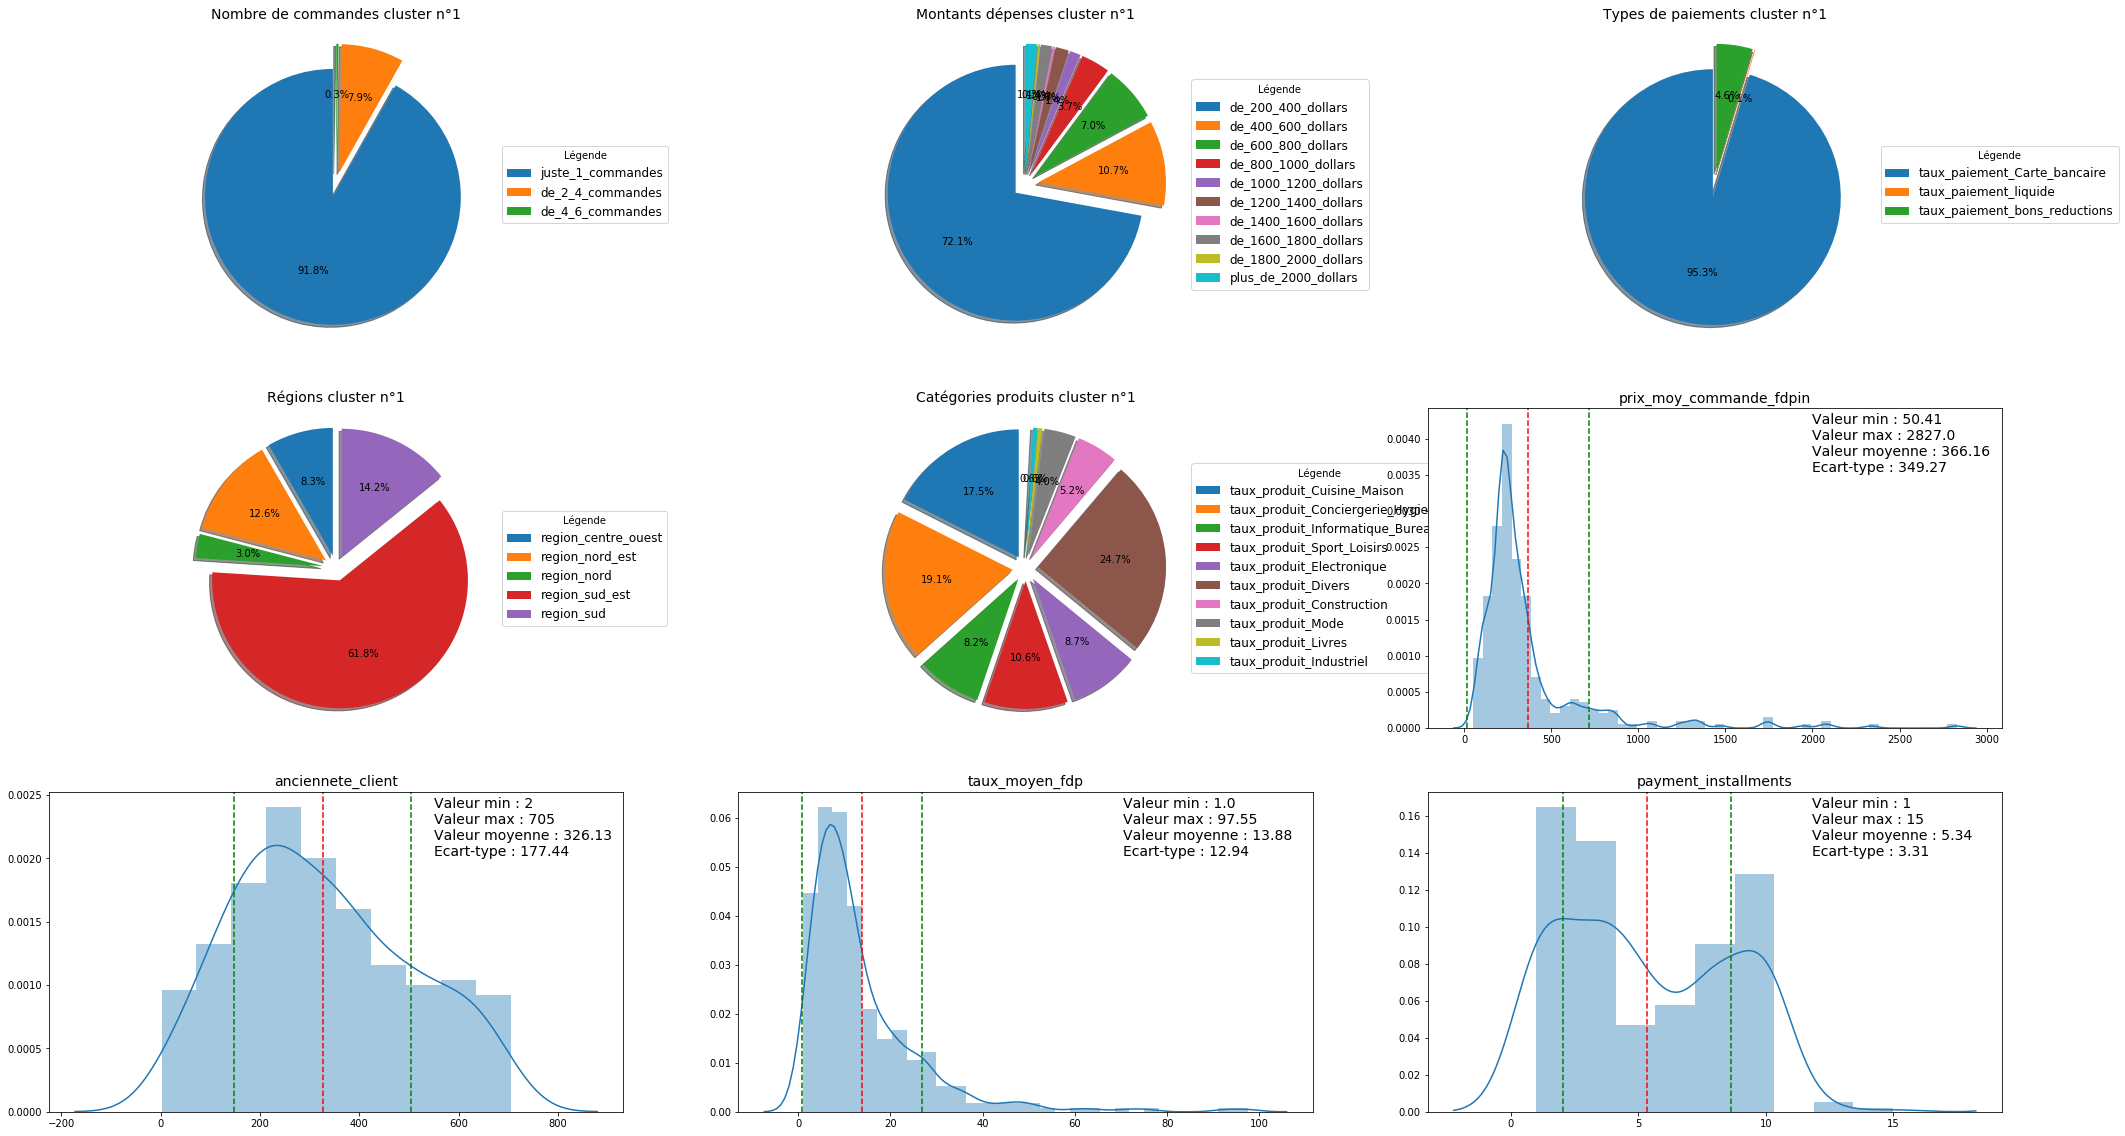

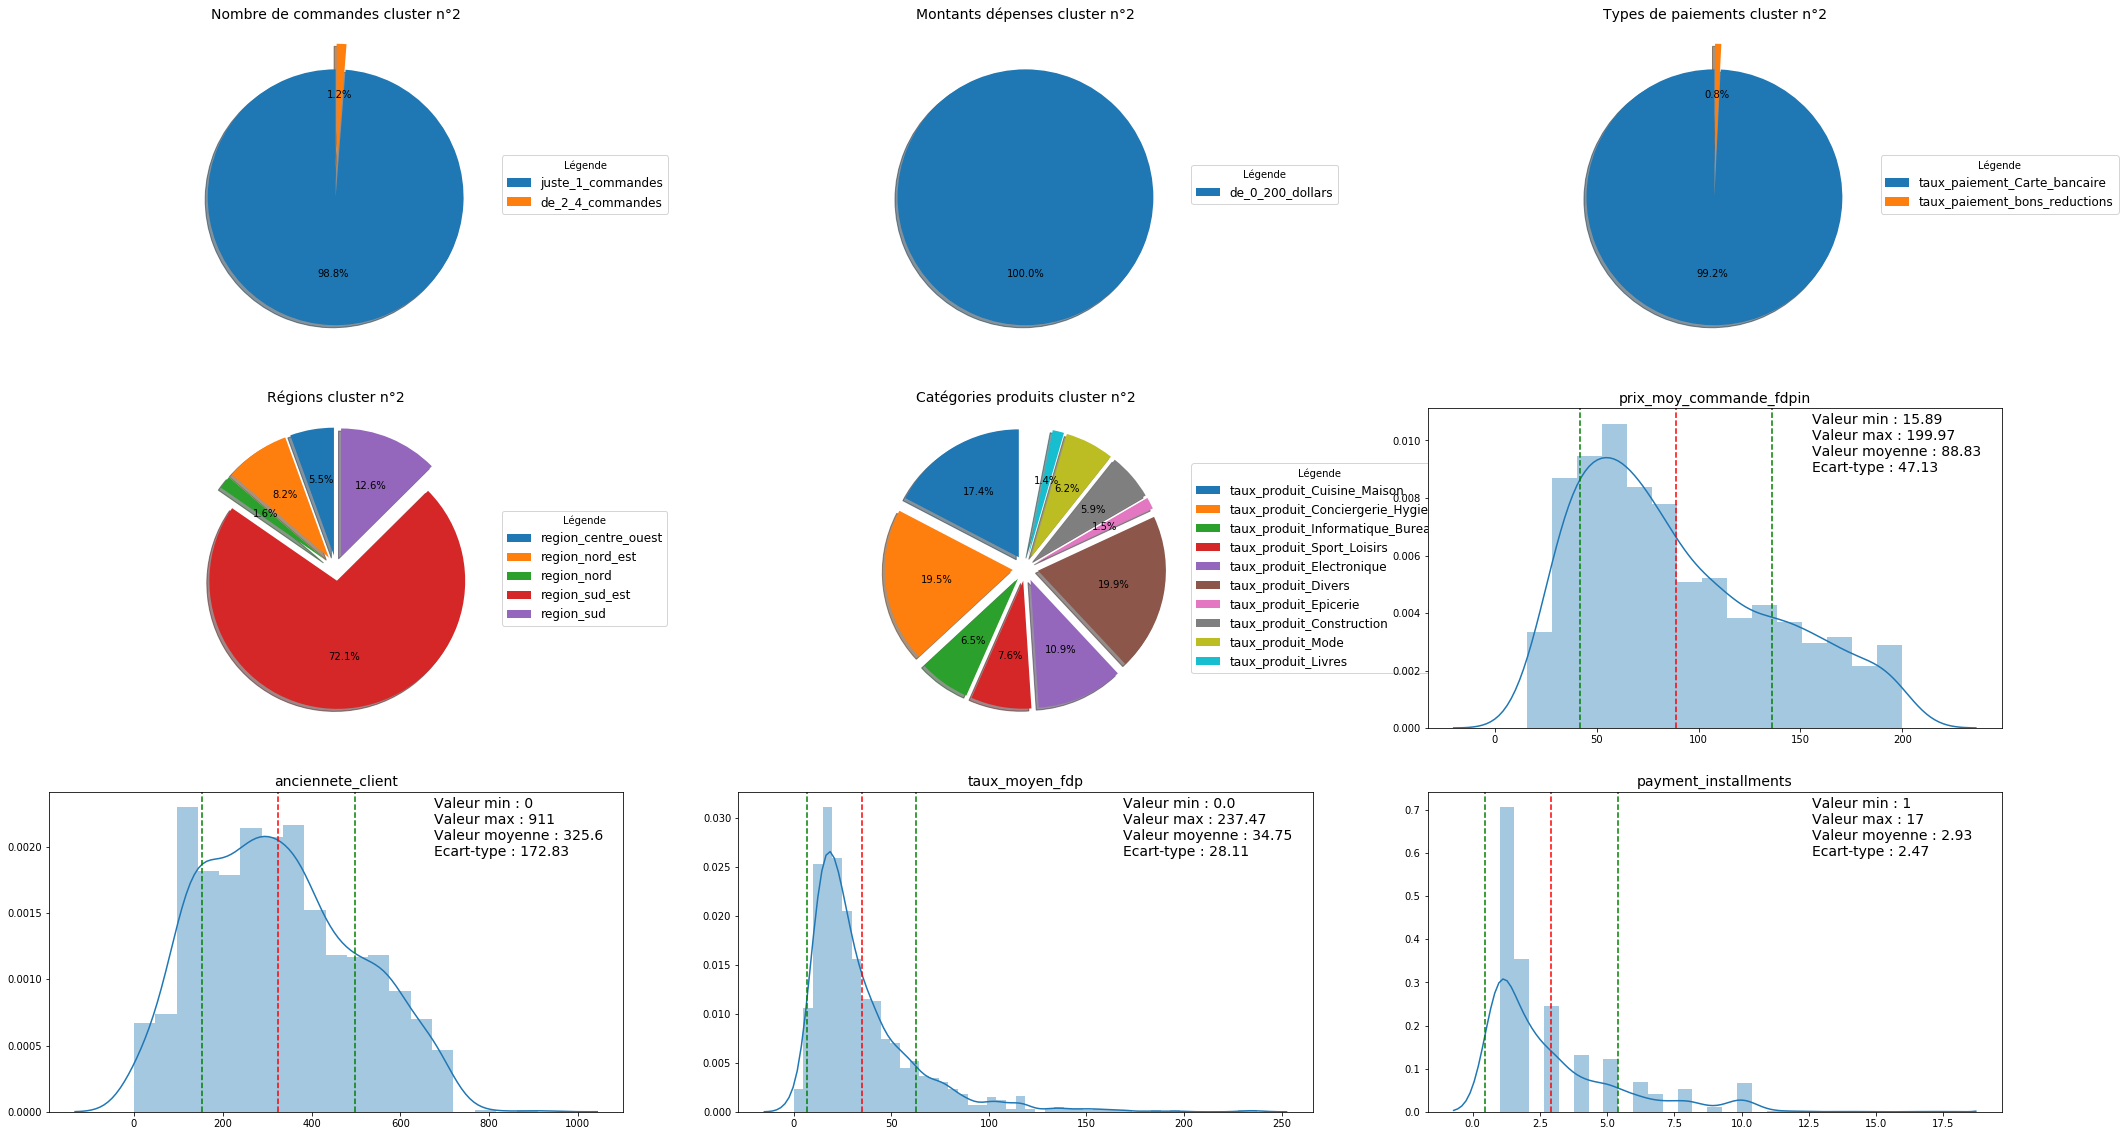

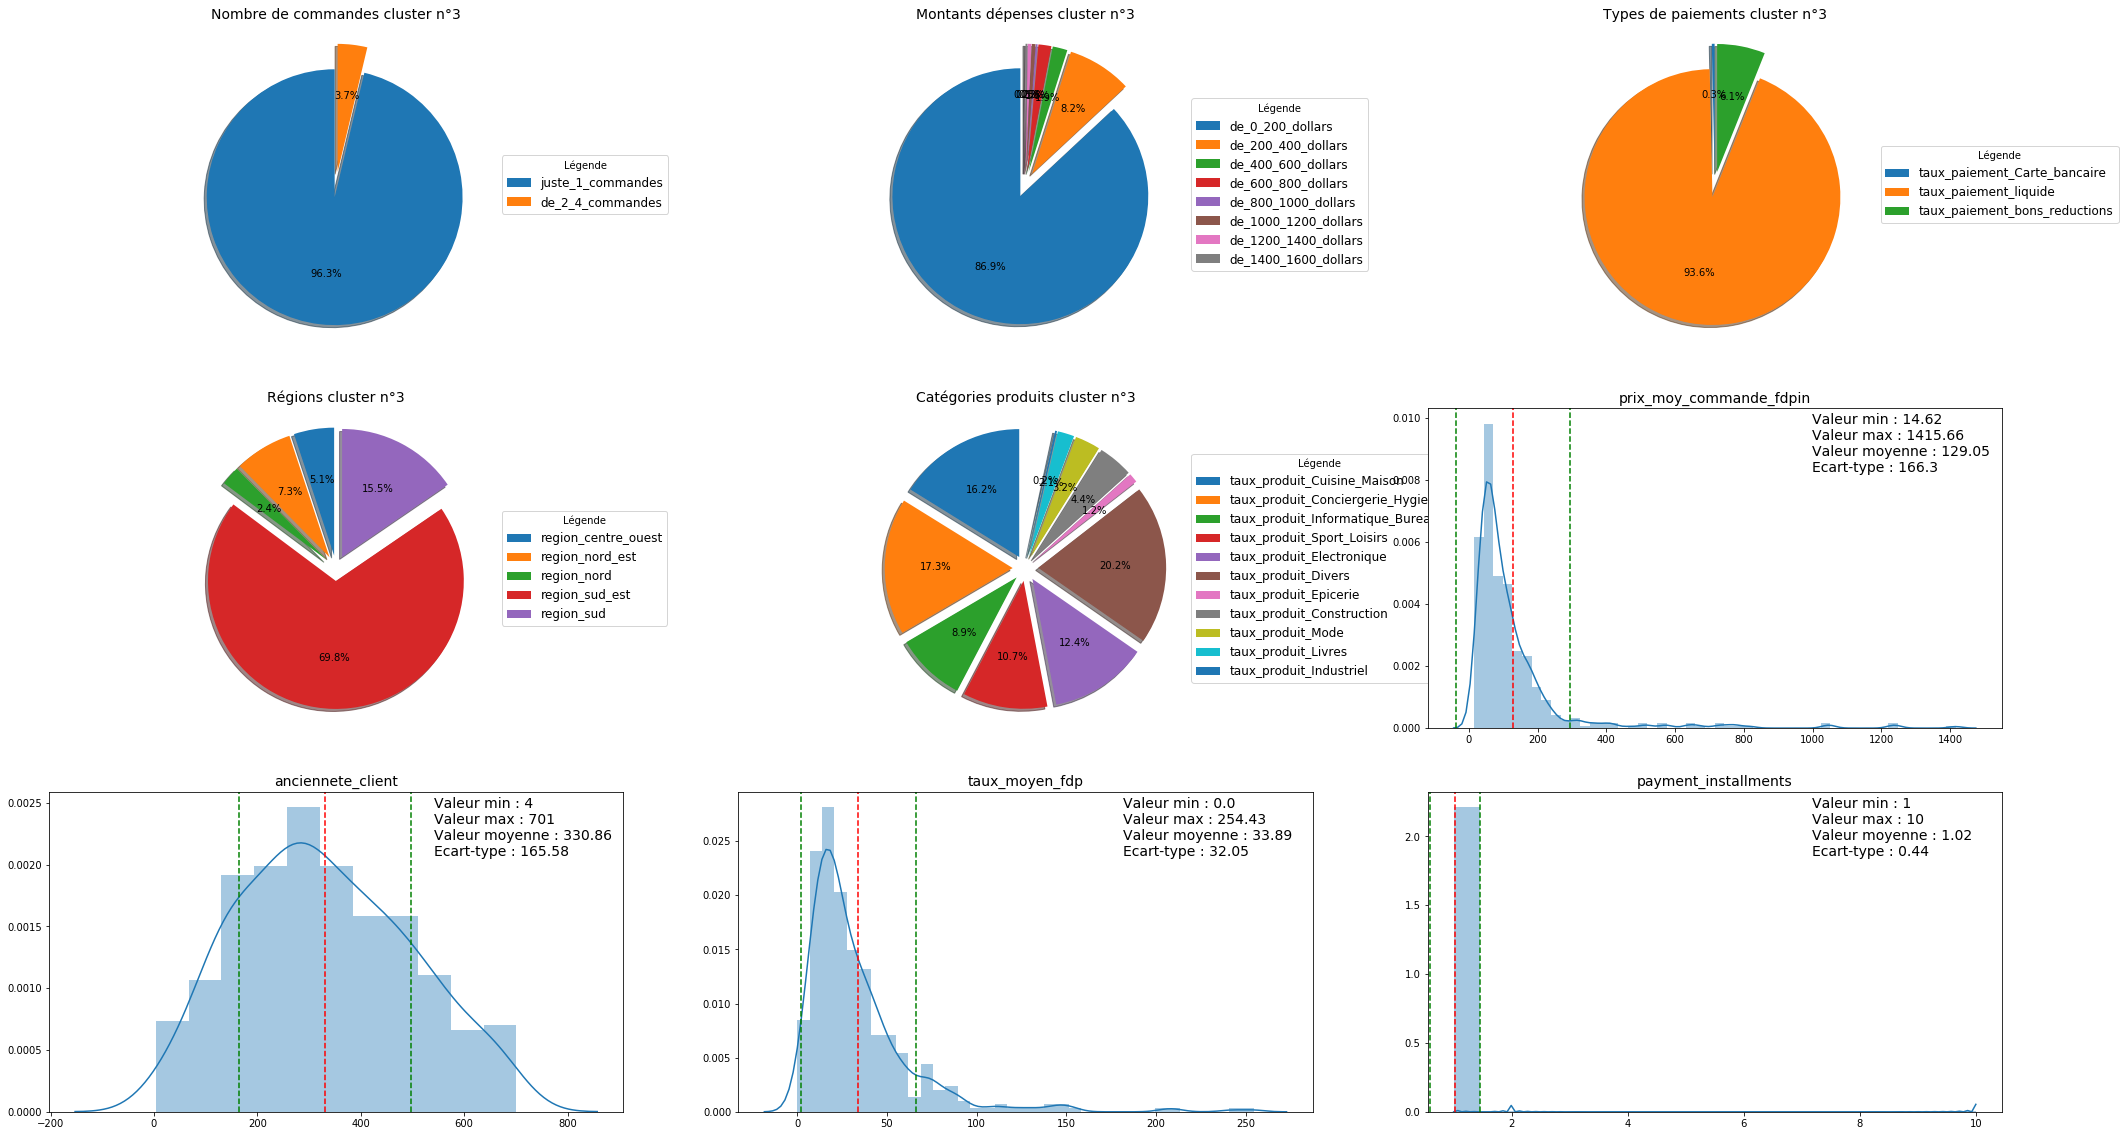

In [34]:
# %%flake8  # checking PEP8 compliance

#Préparation du dataframe avant de boucler sur chaque label de cluster
#On incrémente les numéros de label de 1 car sinon le label 0 n'est pas pris en compte par la fonction
lst_lbl = data_clustering["labels"].unique()
lst_lbl = lst_lbl + 1

data_clustering["labels"] += 1

for lbl in range(lst_lbl.min(), lst_lbl.max()+1):
    
    dataframe = data_clustering[data_clustering["labels"] == lbl]

    # Setup before calling the function
    categorical_labels = dataframe["labels"]
    dataframe = dataframe.drop("labels", axis=1)
    
    print(dataframe.shape)
    # Proceed to the "1 variable ANOVA test"
    results_anova = get_significant_features(
        dataframe,
        categorical_labels,
        threshold=0.05
    )

    # Displays results of ANOVA analysis
    #display(results_anova)

    # Get the significant features (above threshold)
    threshold = 0.05
    mask = (results_anova['p-value'] < threshold)
    significant_features = results_anova[mask].index
    print("Cluster n°", categorical_labels.unique())
    print(len(significant_features), "variables significatives pour expliquer le cluster sur", results_anova.shape[0], ".")
    display(pd.DataFrame(significant_features, columns=["Variables significatives"]))
    
    #Analyses des profils type
    plt.subplots(figsize=(35, 20))
    
    plt.subplot(3,3,1)
    #5- Nombre de commandes
    analyse_categories_somme(dataframe, lbl, "_commandes", "Nombre de commandes")
    
    plt.subplot(3,3,2)
    #1- Tranches de dépenses
    analyse_categories_somme(dataframe, lbl, "_dollars", "Montants dépenses")
    
    plt.subplot(3,3,3)
    #3- Types de paiements
    analyse_categories_moyenne(dataframe, lbl, "taux_paiement_", "Types de paiements")
    
    plt.subplot(3,3,4)
    #4- Géolocalisation
    analyse_categories_somme(dataframe, lbl, "region_", "Régions")
    
    plt.subplot(3,3,5)
    #2- Catégories de produits 
    analyse_categories_moyenne(dataframe, lbl, "taux_produit_", "Catégories produits")
    
    plt.subplot(3,3,6)
    #2- Catégories de produits 
    analyse_distributions(dataframe, "prix_moy_commande_fdpin")
    
    plt.subplot(3,3,7)
    #2- Catégories de produits 
    analyse_distributions(dataframe, "anciennete_client")
    
    plt.subplot(3,3,8)
    #2- Catégories de produits 
    analyse_distributions(dataframe, "taux_moyen_fdp")
    
    plt.subplot(3,3,9)
    #2- Facilités de paiements 
    analyse_distributions(dataframe, "payment_installments")

(376, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [1]
41 variables significatives pour expliquer le cluster sur 60 .


Variables significatives
0                   juste_1_commandes
1                   anciennete_client
2              date_derniere_commande
3                     geolocation_lat
4                     geolocation_lng
5                 region_centre_ouest
6                     region_nord_est
7                      region_sud_est
8                          region_sud
9                    depenses_totales
10            prix_moy_commande_fdpin
11        ecart_type_commande_moyenne
12            prix_max_commande_fdpin
13            prix_min_commande_fdpin
14                   prix_produit_moy
15           ecart_type_produit_moyen
16                   prix_produit_max
17                   prix_produit_min
18                     taux_moyen_fdp
19          ecart_type_taux_moyen_fdp
20               payment_installments
21              delai_livraison_moyen
22                delai_livraison_min
23                delai_livraison_max
24             review_comment_message
25       taux_paiement_Carte_bancaire
26              taux_paiement_liquide
27      taux_paiement_bons_reductions
28        taux_produit_Cuisine_Maison
29  taux_produit_Conciergerie_Hygiene
30   taux_produit_Informatique_Bureau
31         taux_produit_Sport_Loisirs
32          taux_produit_Electronique
33                taux_produit_Divers
34              taux_produit_Epicerie
35          taux_produit_Construction
36                  taux_produit_Mode
37                taux_produit_Livres
38            nbr_paiements_effectues
39               nbr_produits_achetes
40                   de_0_200_dollars

C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarn

(272, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [2]
36 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0                  juste_1_commandes
1                  anciennete_client
2             date_derniere_commande
3                    geolocation_lat
4                    geolocation_lng
5                region_centre_ouest
6                    region_nord_est
7                        region_nord
8                     region_sud_est
9                         region_sud
10                  depenses_totales
11           prix_moy_commande_fdpin
12       ecart_type_commande_moyenne
13           prix_max_commande_fdpin
14           prix_min_commande_fdpin
15                  prix_produit_moy
16          ecart_type_produit_moyen
17                  prix_produit_max
18                  prix_produit_min
19                    taux_moyen_fdp
20         ecart_type_taux_moyen_fdp
21              payment_installments
22             delai_livraison_moyen
23               delai_livraison_min
24               delai_livraison_max
25            review_comment_message
26      taux_paiement_Carte_bancaire
27  taux_produit_Informatique_Bureau
28             taux_produit_Epicerie
29         taux_produit_Construction
30                 taux_produit_Mode
31               taux_produit_Livres
32           taux_produit_Industriel
33           nbr_paiements_effectues
34              nbr_produits_achetes
35                  de_0_200_dollars

(287, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [3]
43 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0                   juste_1_commandes
1                   anciennete_client
2              date_derniere_commande
3                     geolocation_lat
4                     geolocation_lng
5                 region_centre_ouest
6                     region_nord_est
7                      region_sud_est
8                          region_sud
9                    depenses_totales
10            prix_moy_commande_fdpin
11        ecart_type_commande_moyenne
12            prix_max_commande_fdpin
13            prix_min_commande_fdpin
14                   prix_produit_moy
15           ecart_type_produit_moyen
16                   prix_produit_max
17                   prix_produit_min
18                     taux_moyen_fdp
19          ecart_type_taux_moyen_fdp
20               payment_installments
21              delai_livraison_moyen
22                delai_livraison_min
23                delai_livraison_max
24             review_comment_message
25       taux_paiement_Carte_bancaire
26      taux_paiement_bons_reductions
27        taux_produit_Cuisine_Maison
28  taux_produit_Conciergerie_Hygiene
29   taux_produit_Informatique_Bureau
30         taux_produit_Sport_Loisirs
31          taux_produit_Electronique
32                taux_produit_Divers
33          taux_produit_Construction
34                  taux_produit_Mode
35            nbr_paiements_effectues
36               nbr_produits_achetes
37                 de_200_400_dollars
38                 de_400_600_dollars
39                 de_600_800_dollars
40                de_800_1000_dollars
41               de_1000_1200_dollars
42               plus_de_2000_dollars

(252, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [4]
31 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0              juste_1_commandes
1              anciennete_client
2         date_derniere_commande
3                geolocation_lat
4                geolocation_lng
5            region_centre_ouest
6                region_nord_est
7                    region_nord
8                 region_sud_est
9                     region_sud
10              depenses_totales
11       prix_moy_commande_fdpin
12   ecart_type_commande_moyenne
13       prix_max_commande_fdpin
14       prix_min_commande_fdpin
15              prix_produit_moy
16      ecart_type_produit_moyen
17              prix_produit_max
18              prix_produit_min
19                taux_moyen_fdp
20     ecart_type_taux_moyen_fdp
21          payment_installments
22         delai_livraison_moyen
23           delai_livraison_min
24           delai_livraison_max
25        review_comment_message
26  taux_paiement_Carte_bancaire
27           taux_produit_Divers
28       nbr_paiements_effectues
29          nbr_produits_achetes
30              de_0_200_dollars

(251, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [5]
30 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0              juste_1_commandes
1              anciennete_client
2         date_derniere_commande
3                geolocation_lat
4                geolocation_lng
5            region_centre_ouest
6                region_nord_est
7                 region_sud_est
8                     region_sud
9               depenses_totales
10       prix_moy_commande_fdpin
11   ecart_type_commande_moyenne
12       prix_max_commande_fdpin
13       prix_min_commande_fdpin
14              prix_produit_moy
15      ecart_type_produit_moyen
16              prix_produit_max
17              prix_produit_min
18                taux_moyen_fdp
19     ecart_type_taux_moyen_fdp
20          payment_installments
21         delai_livraison_moyen
22           delai_livraison_min
23           delai_livraison_max
24        review_comment_message
25  taux_paiement_Carte_bancaire
26   taux_produit_Cuisine_Maison
27       nbr_paiements_effectues
28          nbr_produits_achetes
29              de_0_200_dollars

C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


(228, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [6]
31 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0                   juste_1_commandes
1                   anciennete_client
2              date_derniere_commande
3                     geolocation_lat
4                     geolocation_lng
5                 region_centre_ouest
6                     region_nord_est
7                         region_nord
8                      region_sud_est
9                          region_sud
10                   depenses_totales
11            prix_moy_commande_fdpin
12        ecart_type_commande_moyenne
13            prix_max_commande_fdpin
14            prix_min_commande_fdpin
15                   prix_produit_moy
16           ecart_type_produit_moyen
17                   prix_produit_max
18                   prix_produit_min
19                     taux_moyen_fdp
20          ecart_type_taux_moyen_fdp
21               payment_installments
22              delai_livraison_moyen
23                delai_livraison_min
24                delai_livraison_max
25             review_comment_message
26       taux_paiement_Carte_bancaire
27  taux_produit_Conciergerie_Hygiene
28            nbr_paiements_effectues
29               nbr_produits_achetes
30                   de_0_200_dollars

C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

(48, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Cluster n° [7]
34 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Variables significatives
0                   anciennete_client
1              date_derniere_commande
2                     geolocation_lat
3                     geolocation_lng
4                     region_nord_est
5                      region_sud_est
6                          region_sud
7                    depenses_totales
8             prix_moy_commande_fdpin
9         ecart_type_commande_moyenne
10            prix_max_commande_fdpin
11            prix_min_commande_fdpin
12                   prix_produit_moy
13           ecart_type_produit_moyen
14                   prix_produit_max
15                   prix_produit_min
16                     taux_moyen_fdp
17          ecart_type_taux_moyen_fdp
18               payment_installments
19              delai_livraison_moyen
20                delai_livraison_min
21                delai_livraison_max
22             review_comment_message
23       taux_paiement_Carte_bancaire
24              taux_paiement_liquide
25        taux_produit_Cuisine_Maison
26  taux_produit_Conciergerie_Hygiene
27   taux_produit_Informatique_Bureau
28                taux_produit_Divers
29            nbr_paiements_effectues
30               nbr_produits_achetes
31                   de_0_200_dollars
32                 de_200_400_dollars
33                 de_400_600_dollars

(149, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [8]
30 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0              juste_1_commandes
1              anciennete_client
2         date_derniere_commande
3                geolocation_lat
4                geolocation_lng
5            region_centre_ouest
6                region_nord_est
7                 region_sud_est
8                     region_sud
9               depenses_totales
10       prix_moy_commande_fdpin
11   ecart_type_commande_moyenne
12       prix_max_commande_fdpin
13       prix_min_commande_fdpin
14              prix_produit_moy
15      ecart_type_produit_moyen
16              prix_produit_max
17              prix_produit_min
18                taux_moyen_fdp
19     ecart_type_taux_moyen_fdp
20          payment_installments
21         delai_livraison_moyen
22           delai_livraison_min
23           delai_livraison_max
24        review_comment_message
25  taux_paiement_Carte_bancaire
26     taux_produit_Electronique
27       nbr_paiements_effectues
28          nbr_produits_achetes
29              de_0_200_dollars

(94, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [9]
30 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0              juste_1_commandes
1              anciennete_client
2         date_derniere_commande
3                geolocation_lat
4                geolocation_lng
5            region_centre_ouest
6                region_nord_est
7                 region_sud_est
8                     region_sud
9               depenses_totales
10       prix_moy_commande_fdpin
11   ecart_type_commande_moyenne
12       prix_max_commande_fdpin
13       prix_min_commande_fdpin
14              prix_produit_moy
15      ecart_type_produit_moyen
16              prix_produit_max
17              prix_produit_min
18                taux_moyen_fdp
19     ecart_type_taux_moyen_fdp
20          payment_installments
21         delai_livraison_moyen
22           delai_livraison_min
23           delai_livraison_max
24        review_comment_message
25  taux_paiement_Carte_bancaire
26    taux_produit_Sport_Loisirs
27       nbr_paiements_effectues
28          nbr_produits_achetes
29              de_0_200_dollars

C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


(43, 60)


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\si

Cluster n° [10]
34 variables significatives pour expliquer le cluster sur 60 .


C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)


Variables significatives
0                   juste_1_commandes
1                   anciennete_client
2              date_derniere_commande
3                     geolocation_lat
4                     geolocation_lng
5                         region_nord
6                      region_sud_est
7                          region_sud
8                    depenses_totales
9             prix_moy_commande_fdpin
10        ecart_type_commande_moyenne
11            prix_max_commande_fdpin
12            prix_min_commande_fdpin
13                   prix_produit_moy
14           ecart_type_produit_moyen
15                   prix_produit_max
16                   prix_produit_min
17                     taux_moyen_fdp
18          ecart_type_taux_moyen_fdp
19               payment_installments
20              delai_livraison_moyen
21                delai_livraison_min
22                delai_livraison_max
23             review_comment_message
24              taux_paiement_liquide
25        taux_produit_Cuisine_Maison
26  taux_produit_Conciergerie_Hygiene
27   taux_produit_Informatique_Bureau
28          taux_produit_Electronique
29                taux_produit_Divers
30          taux_produit_Construction
31            nbr_paiements_effectues
32               nbr_produits_achetes
33                 de_200_400_dollars

C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\julie\Anaconda\envs\Projet 5\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


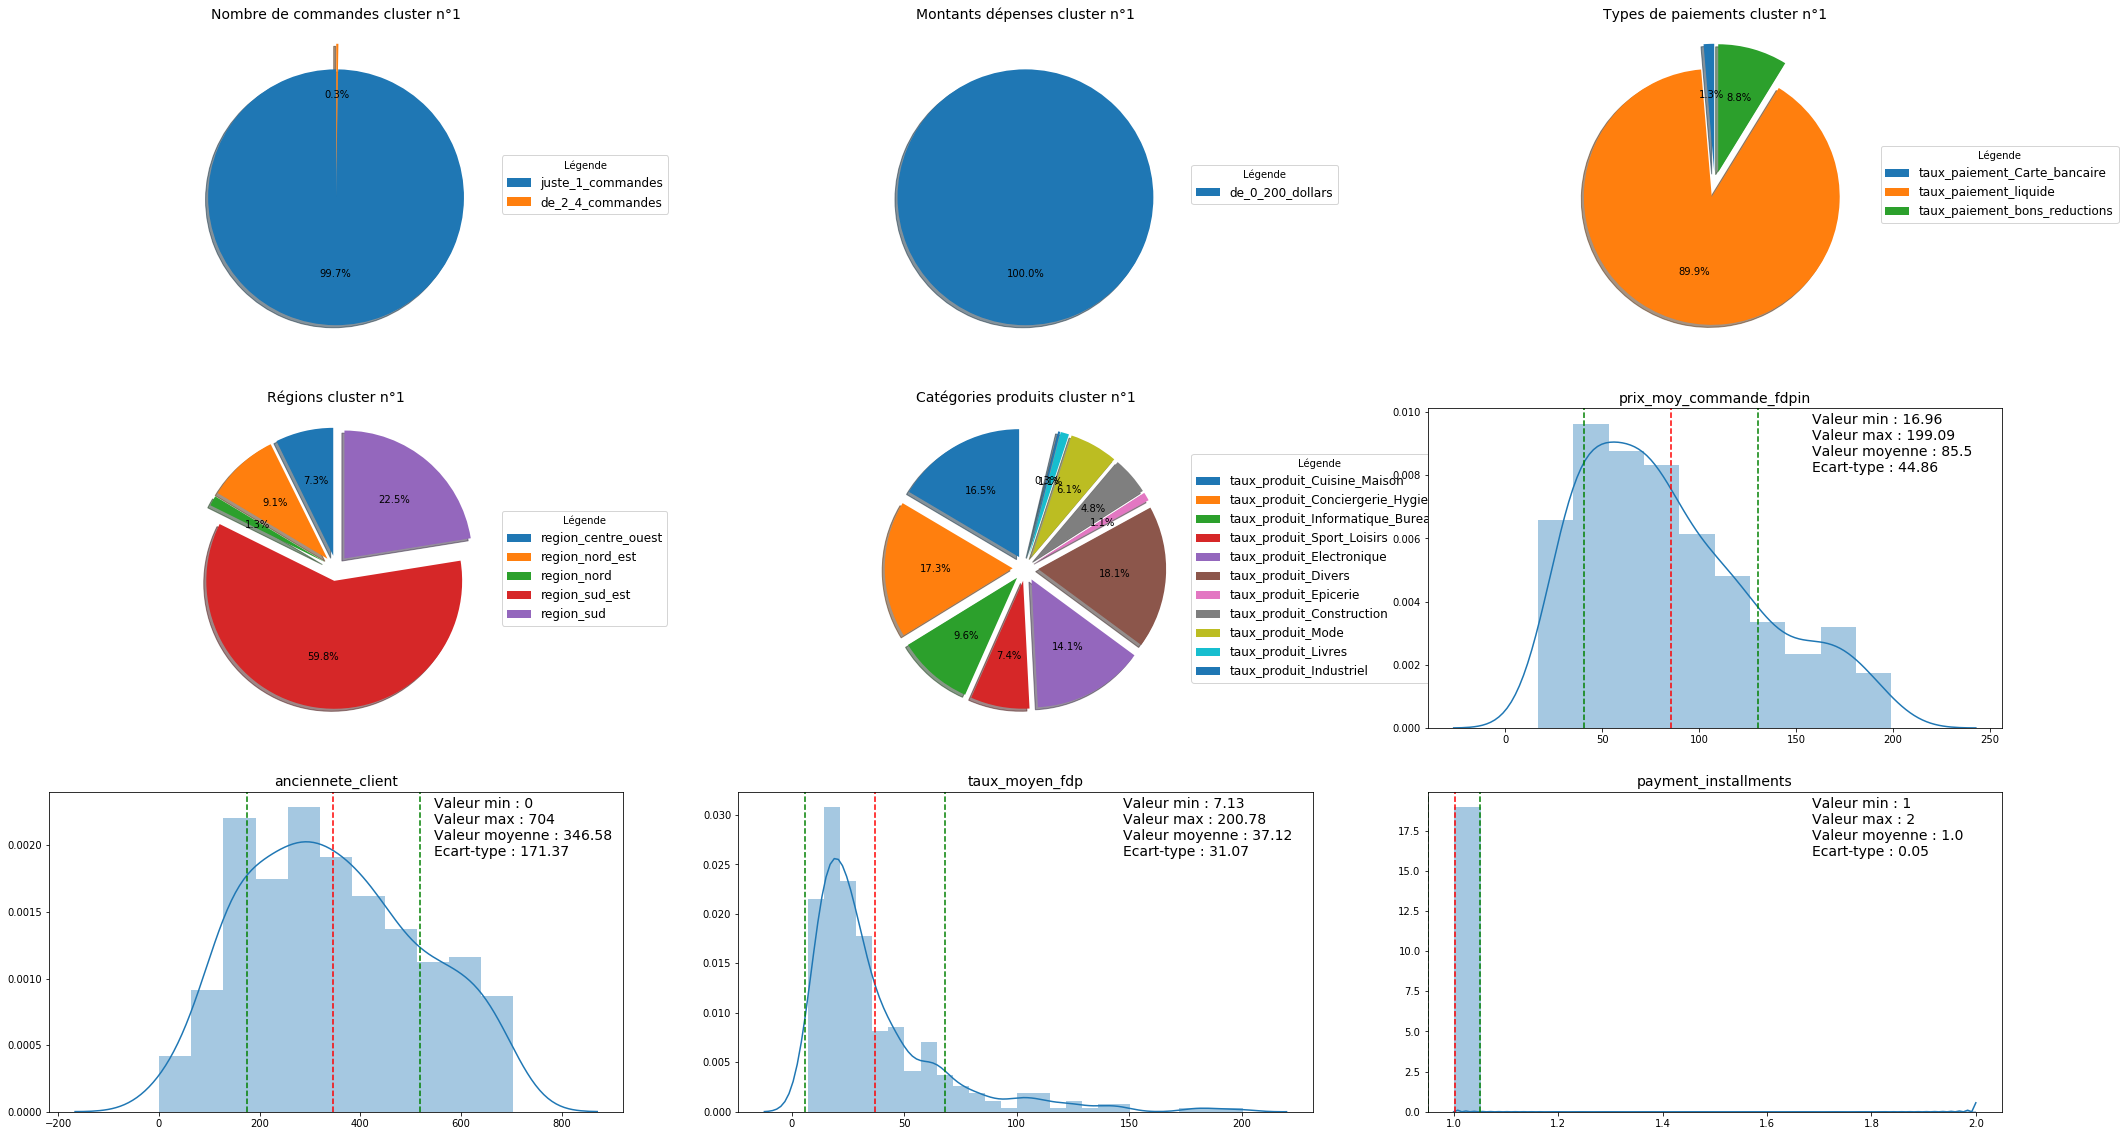

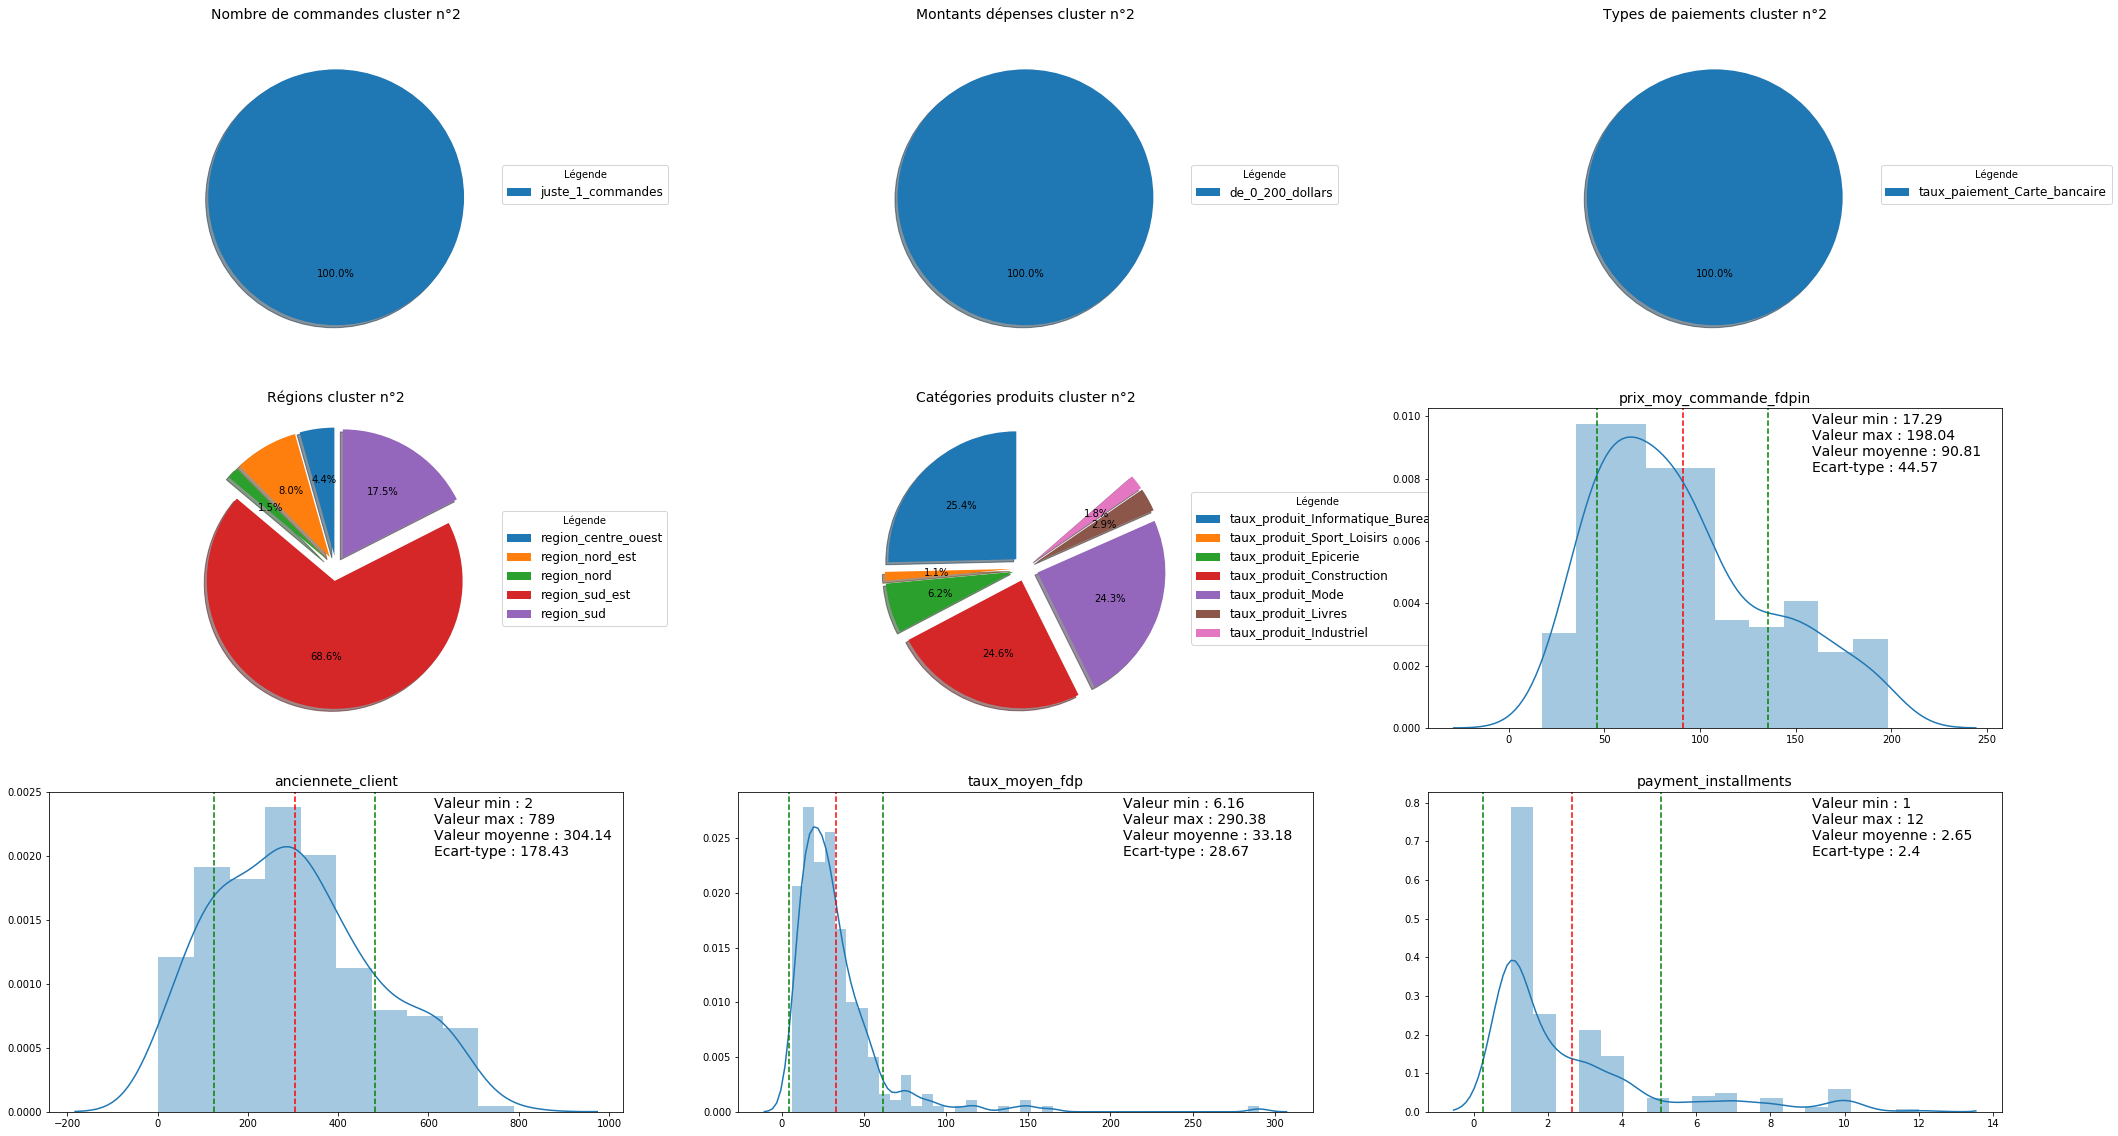

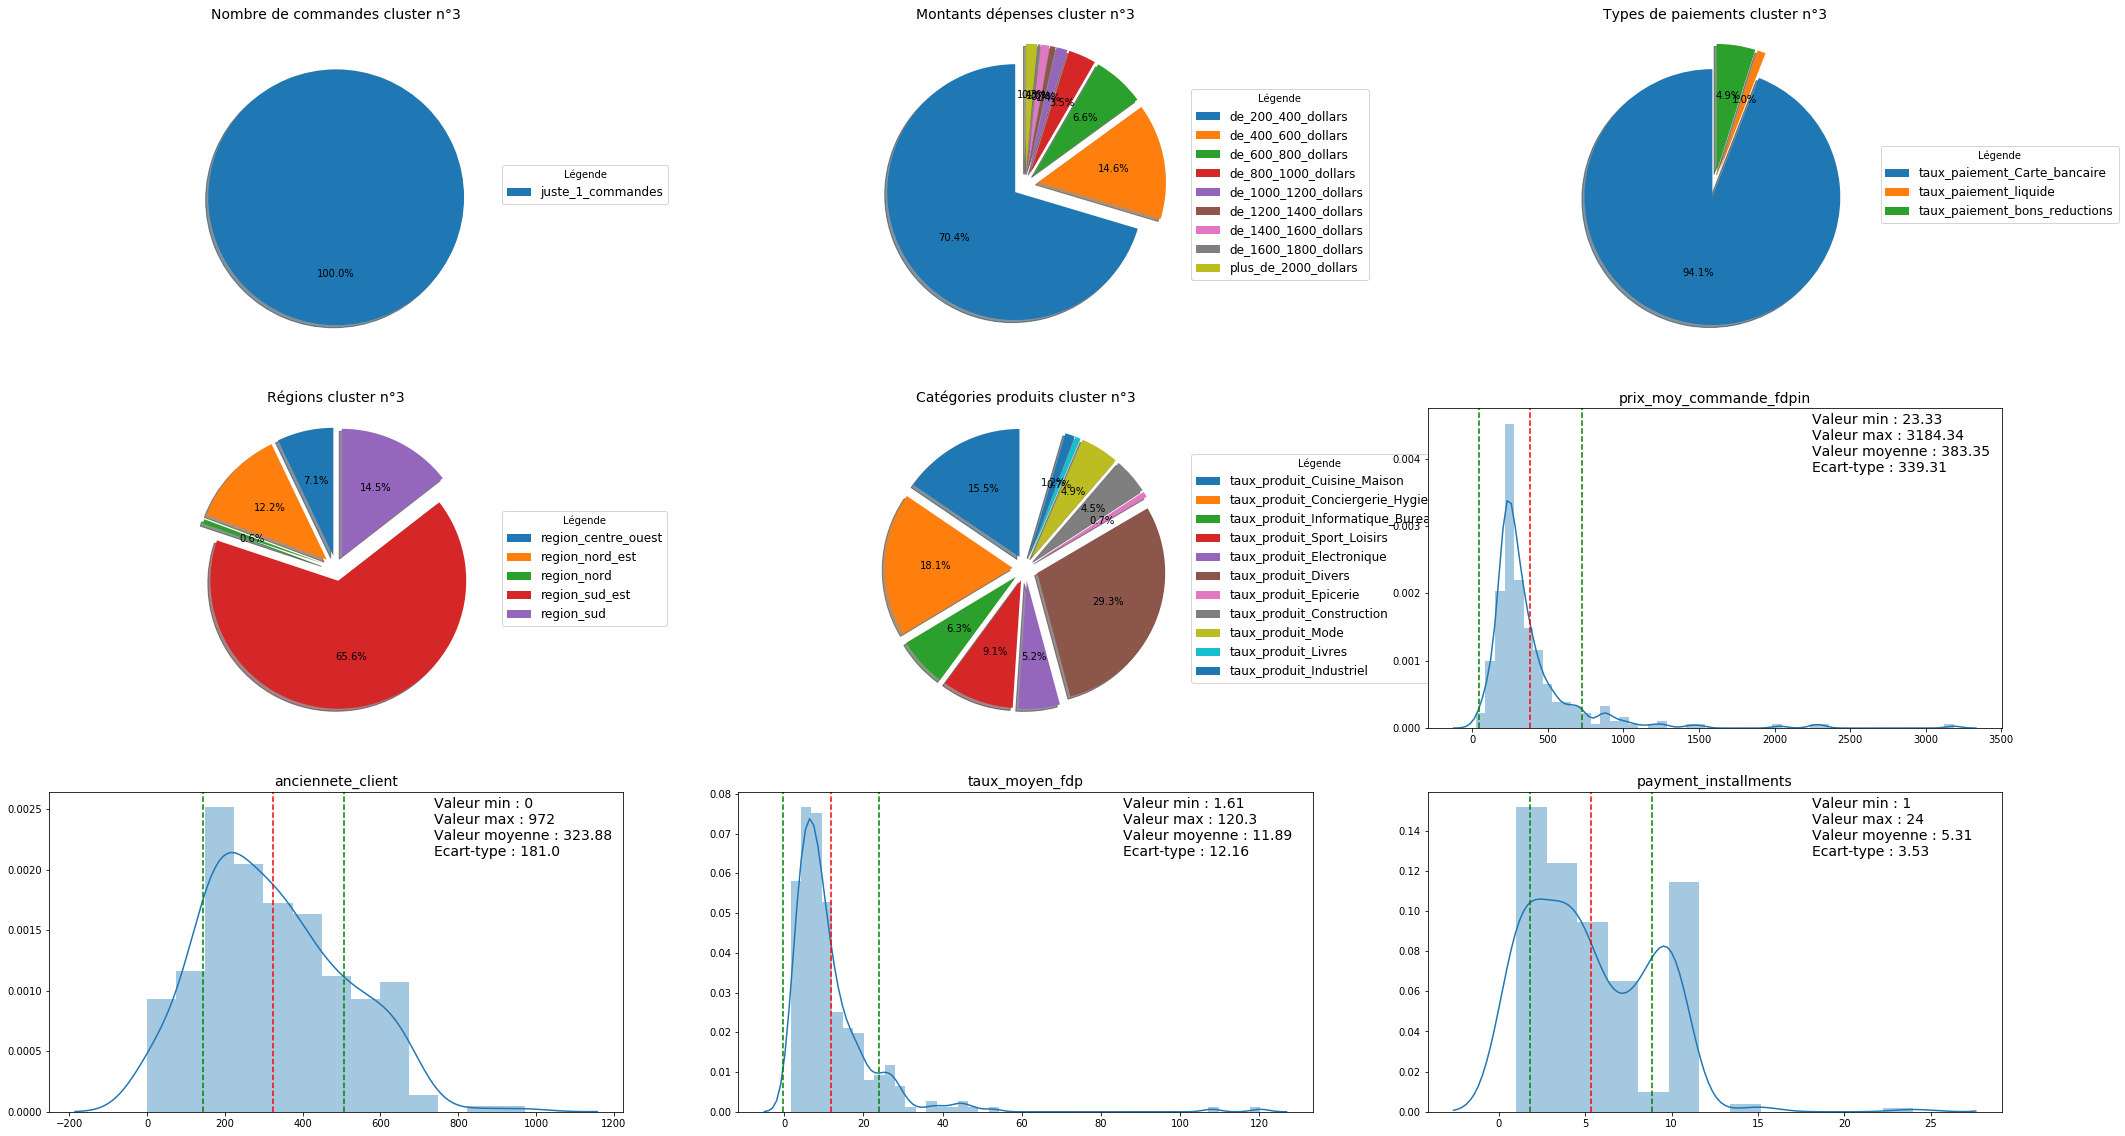

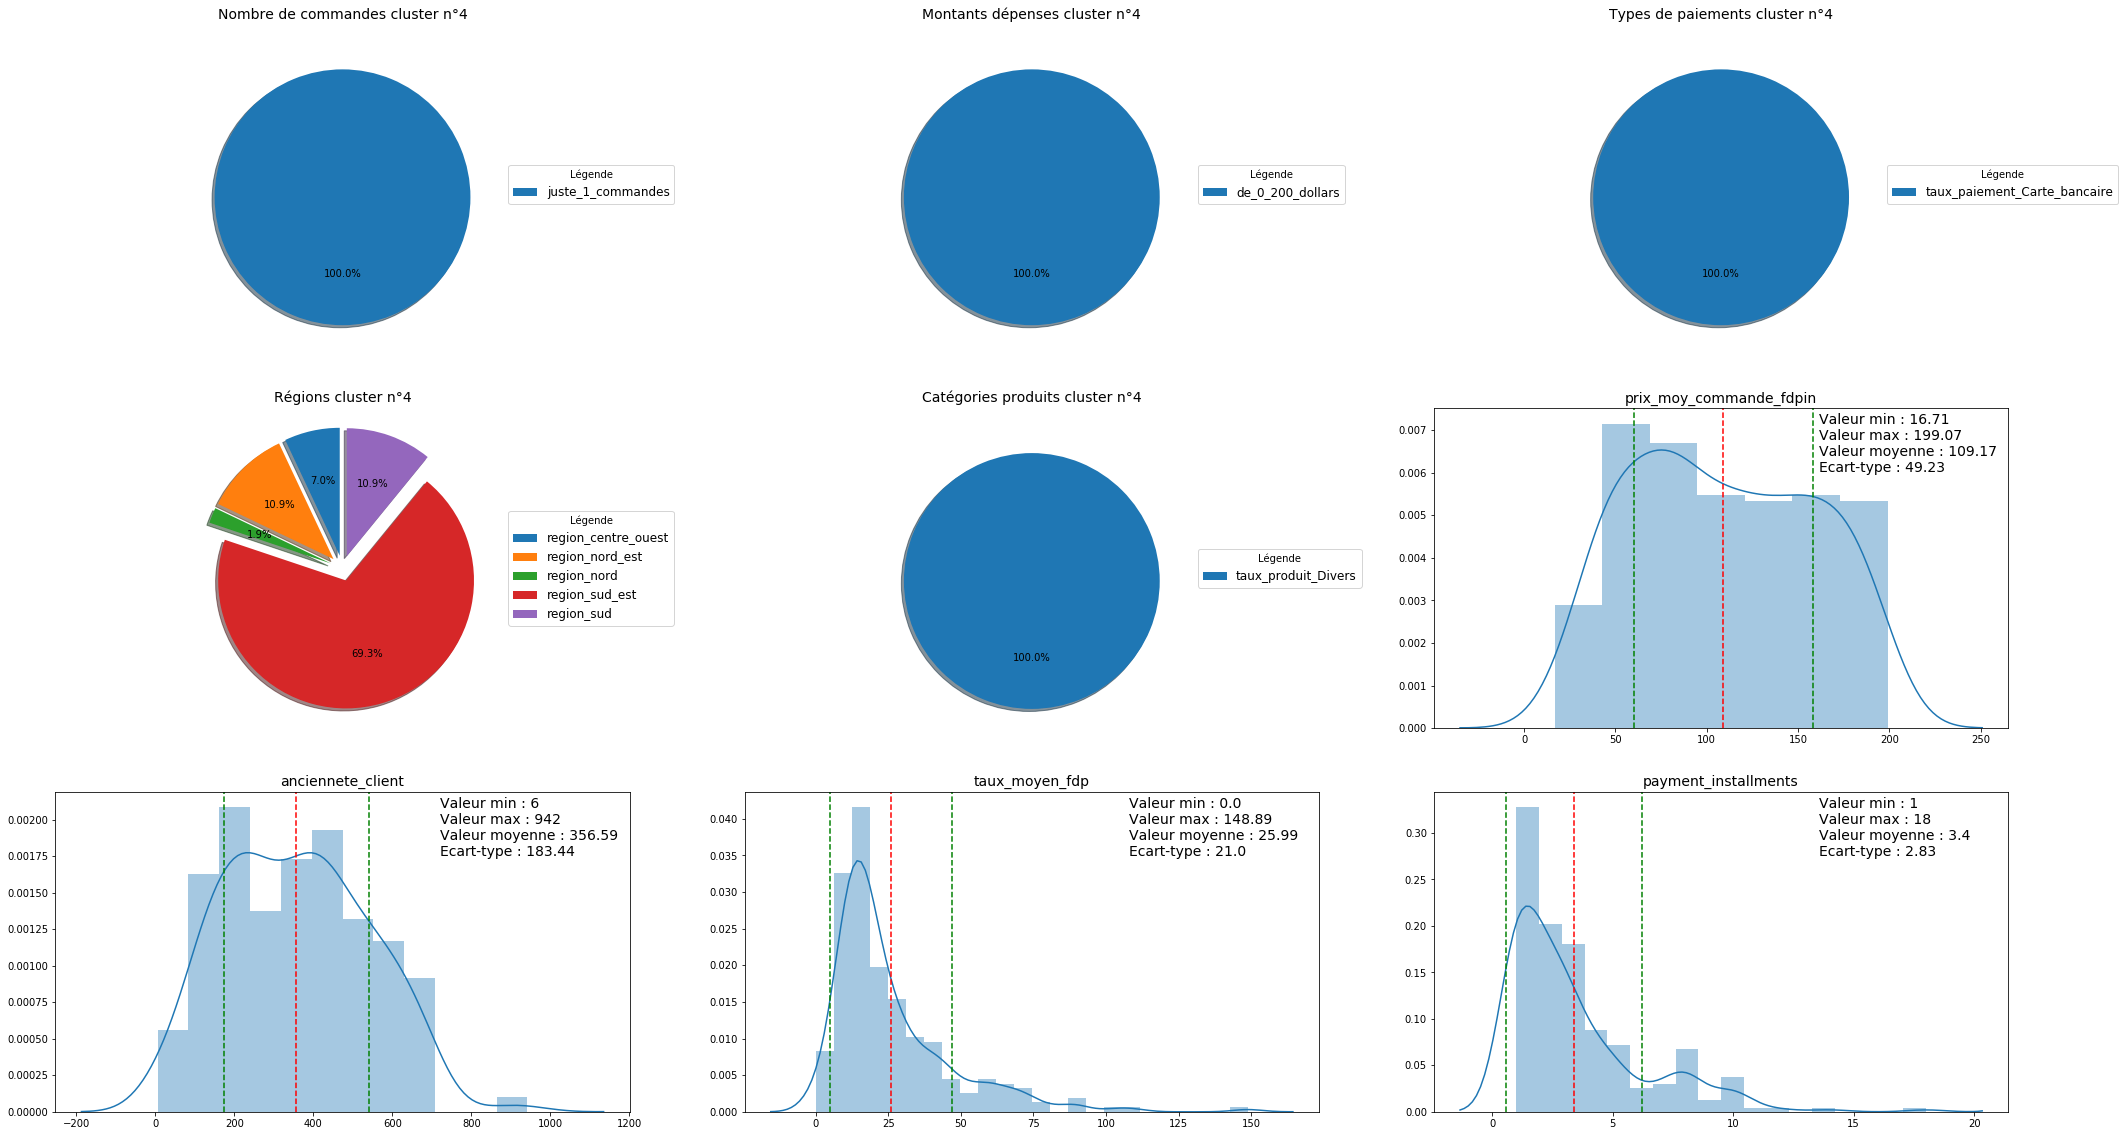

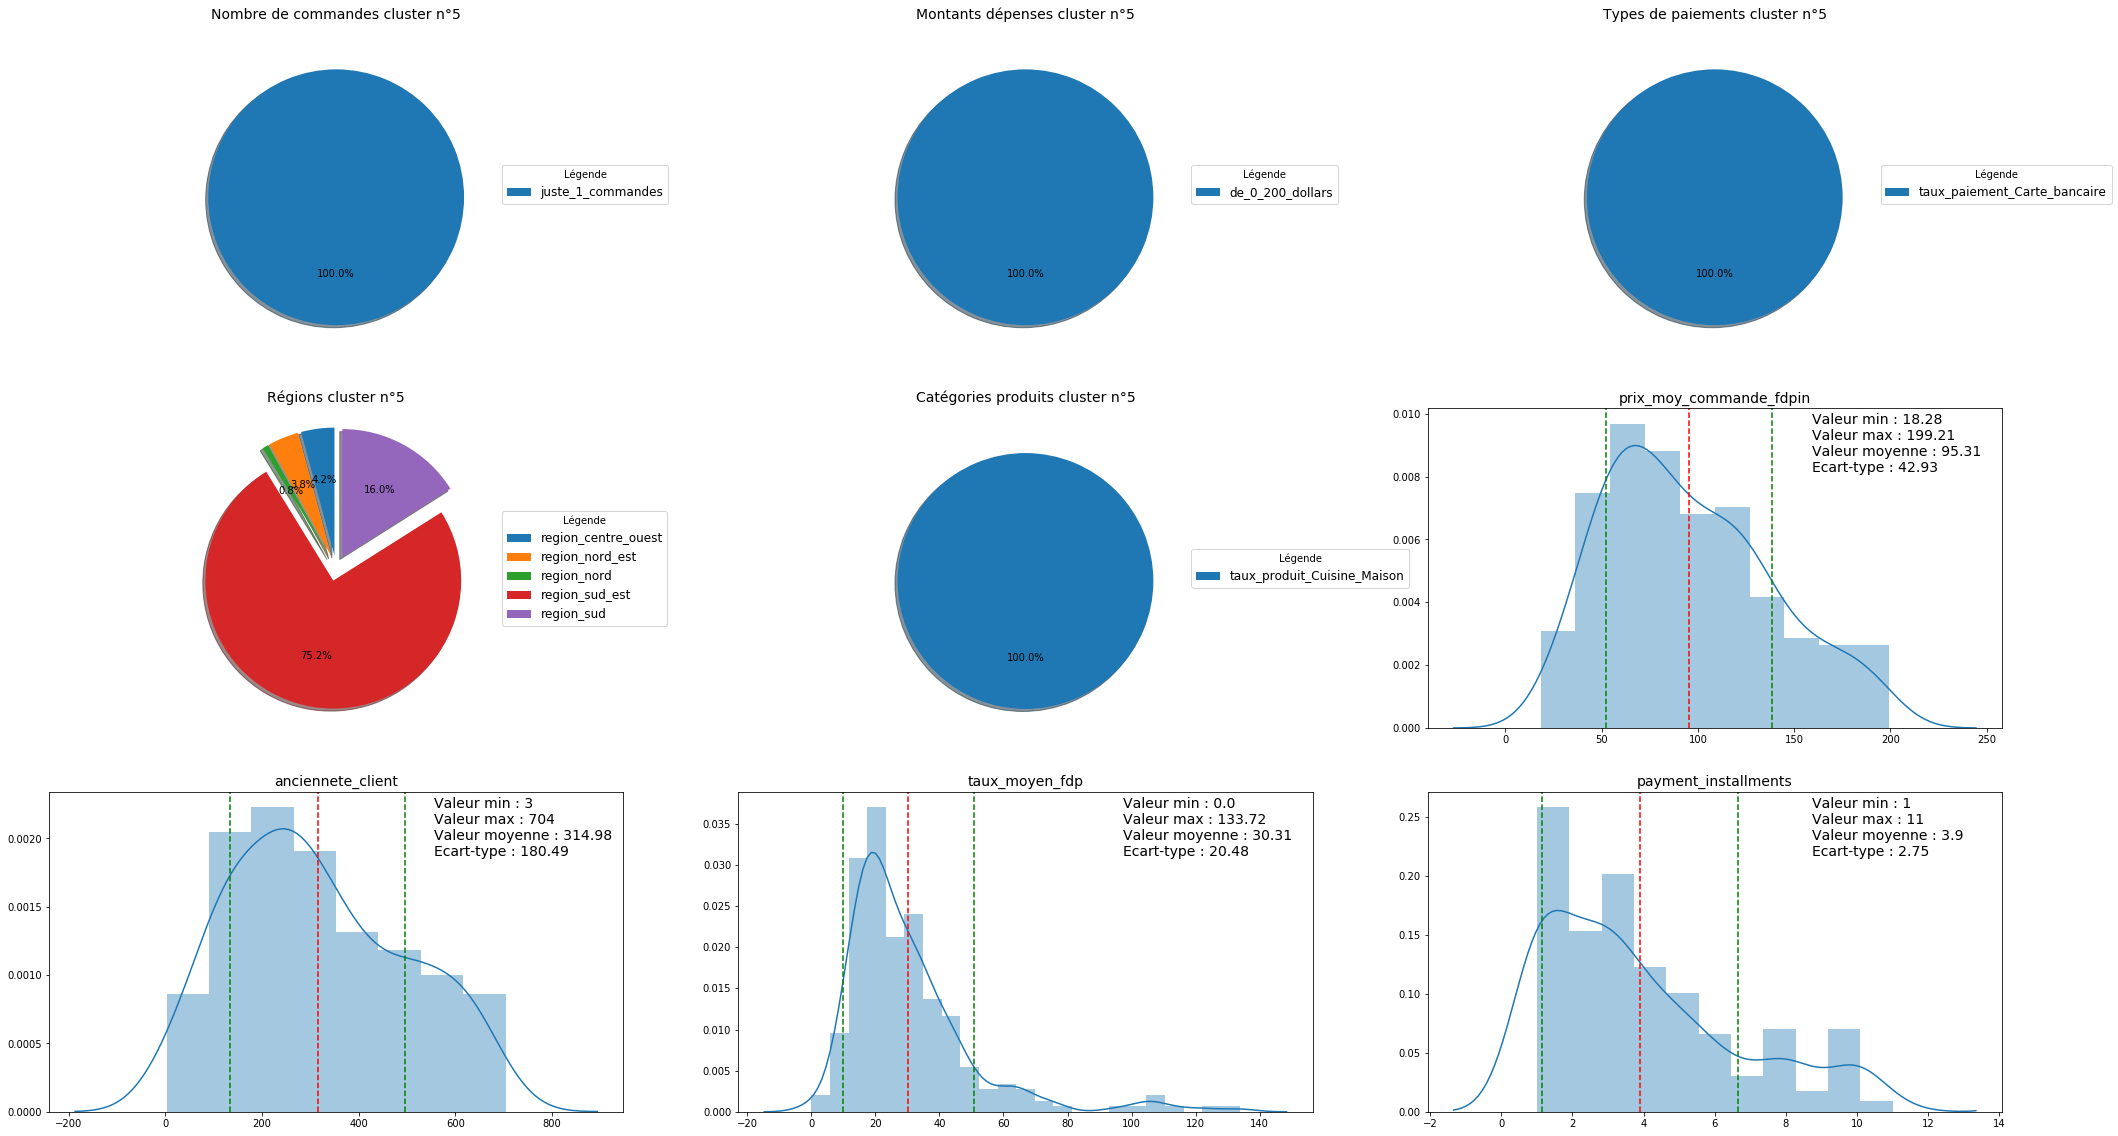

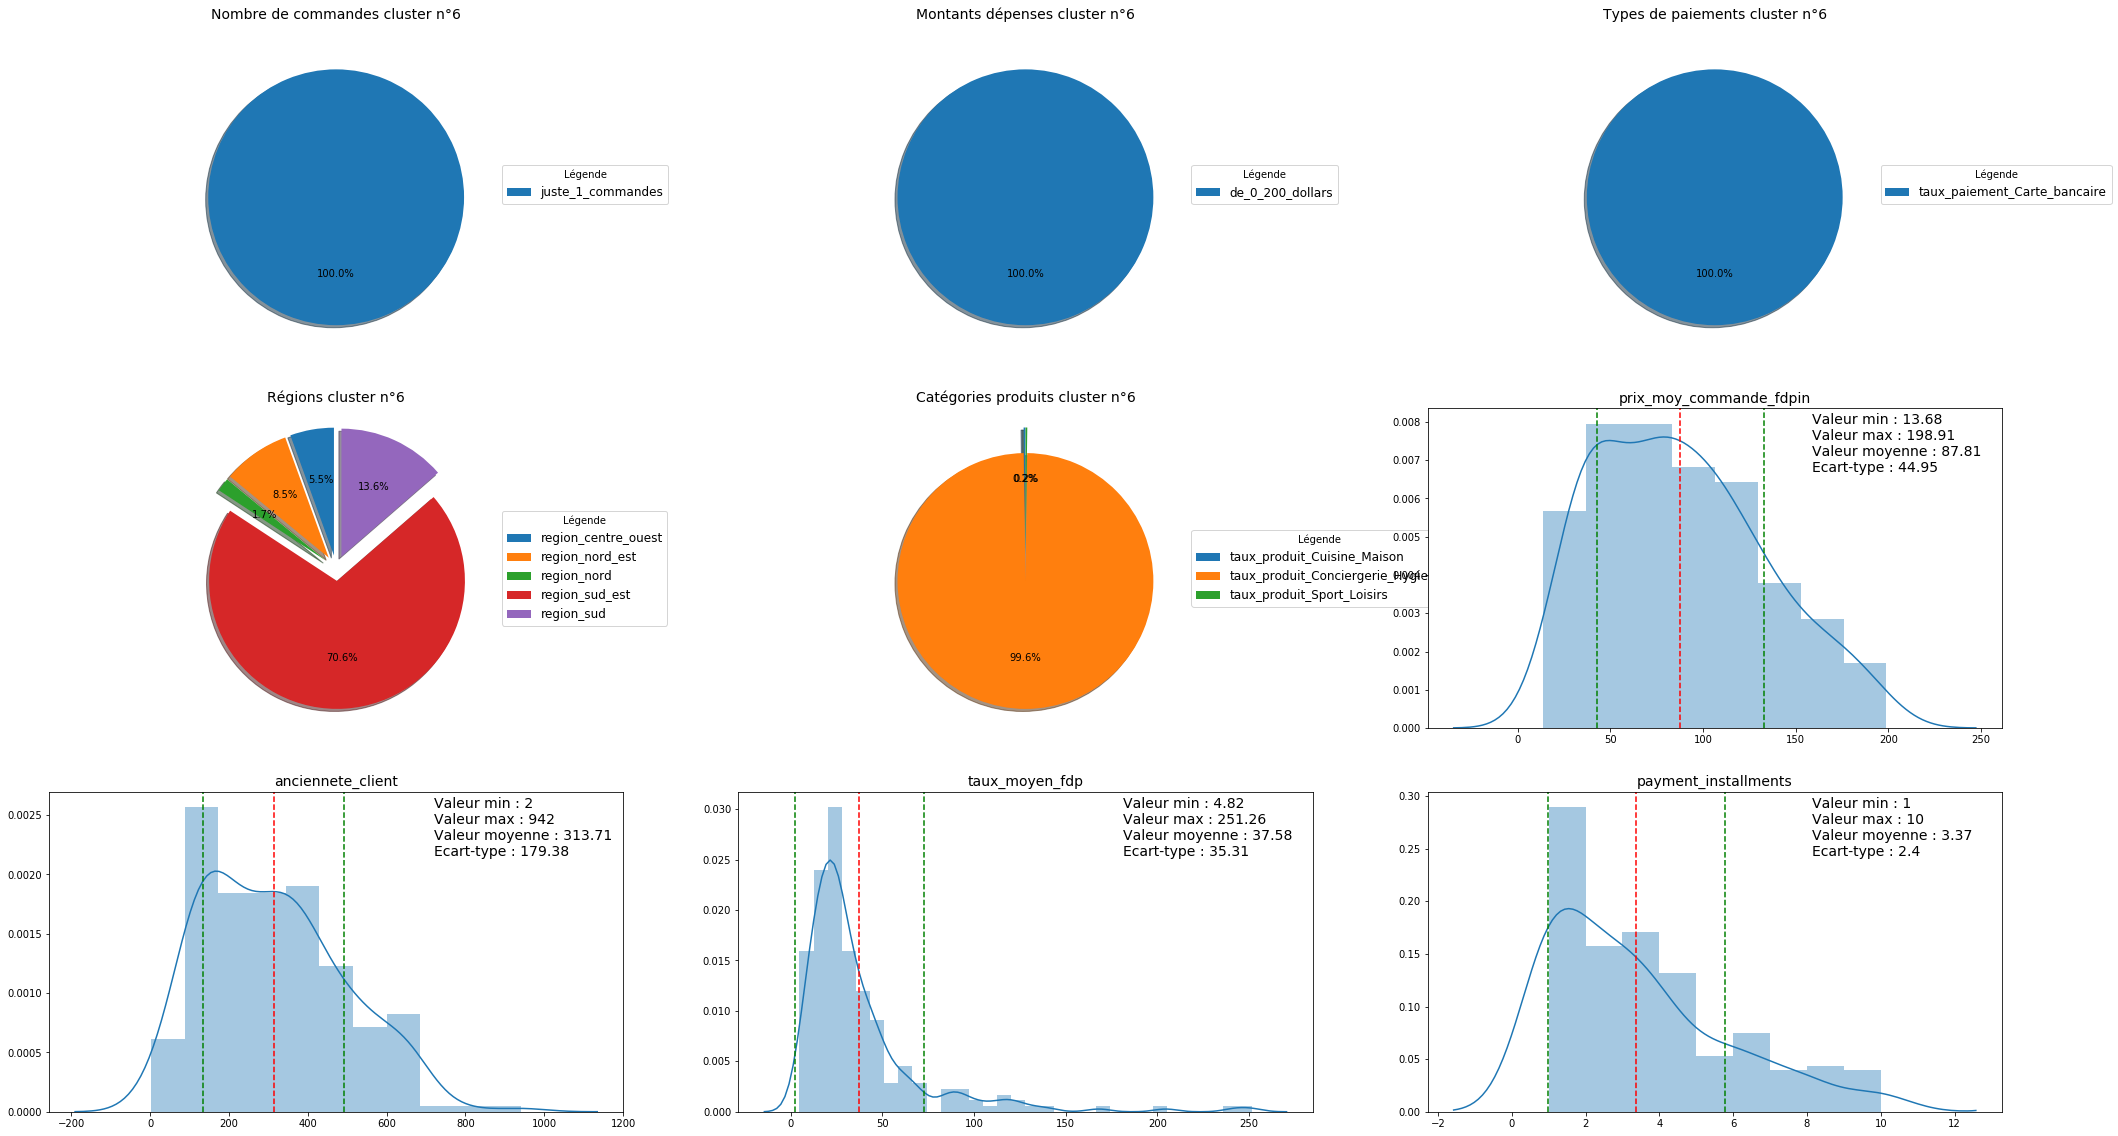

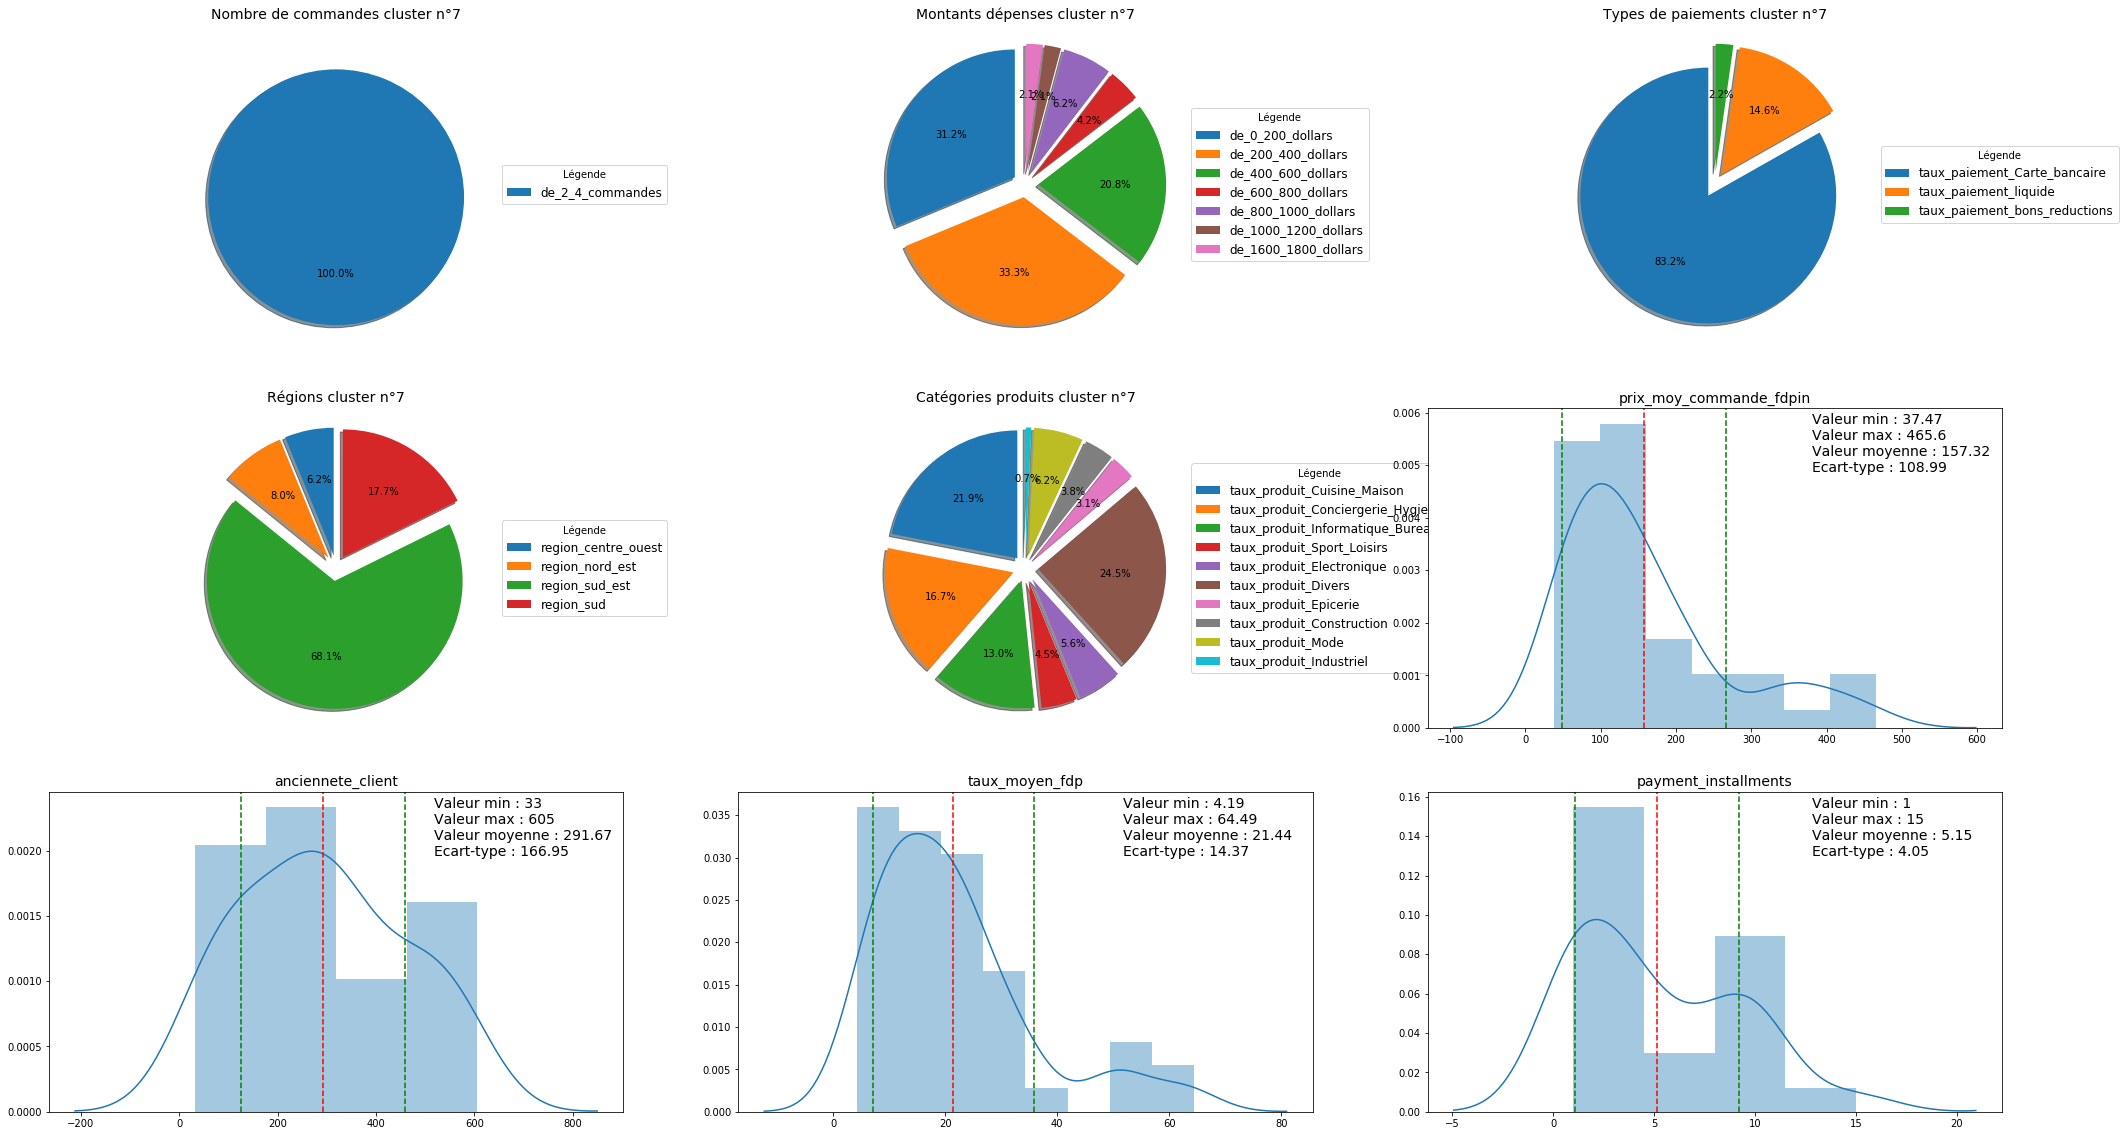

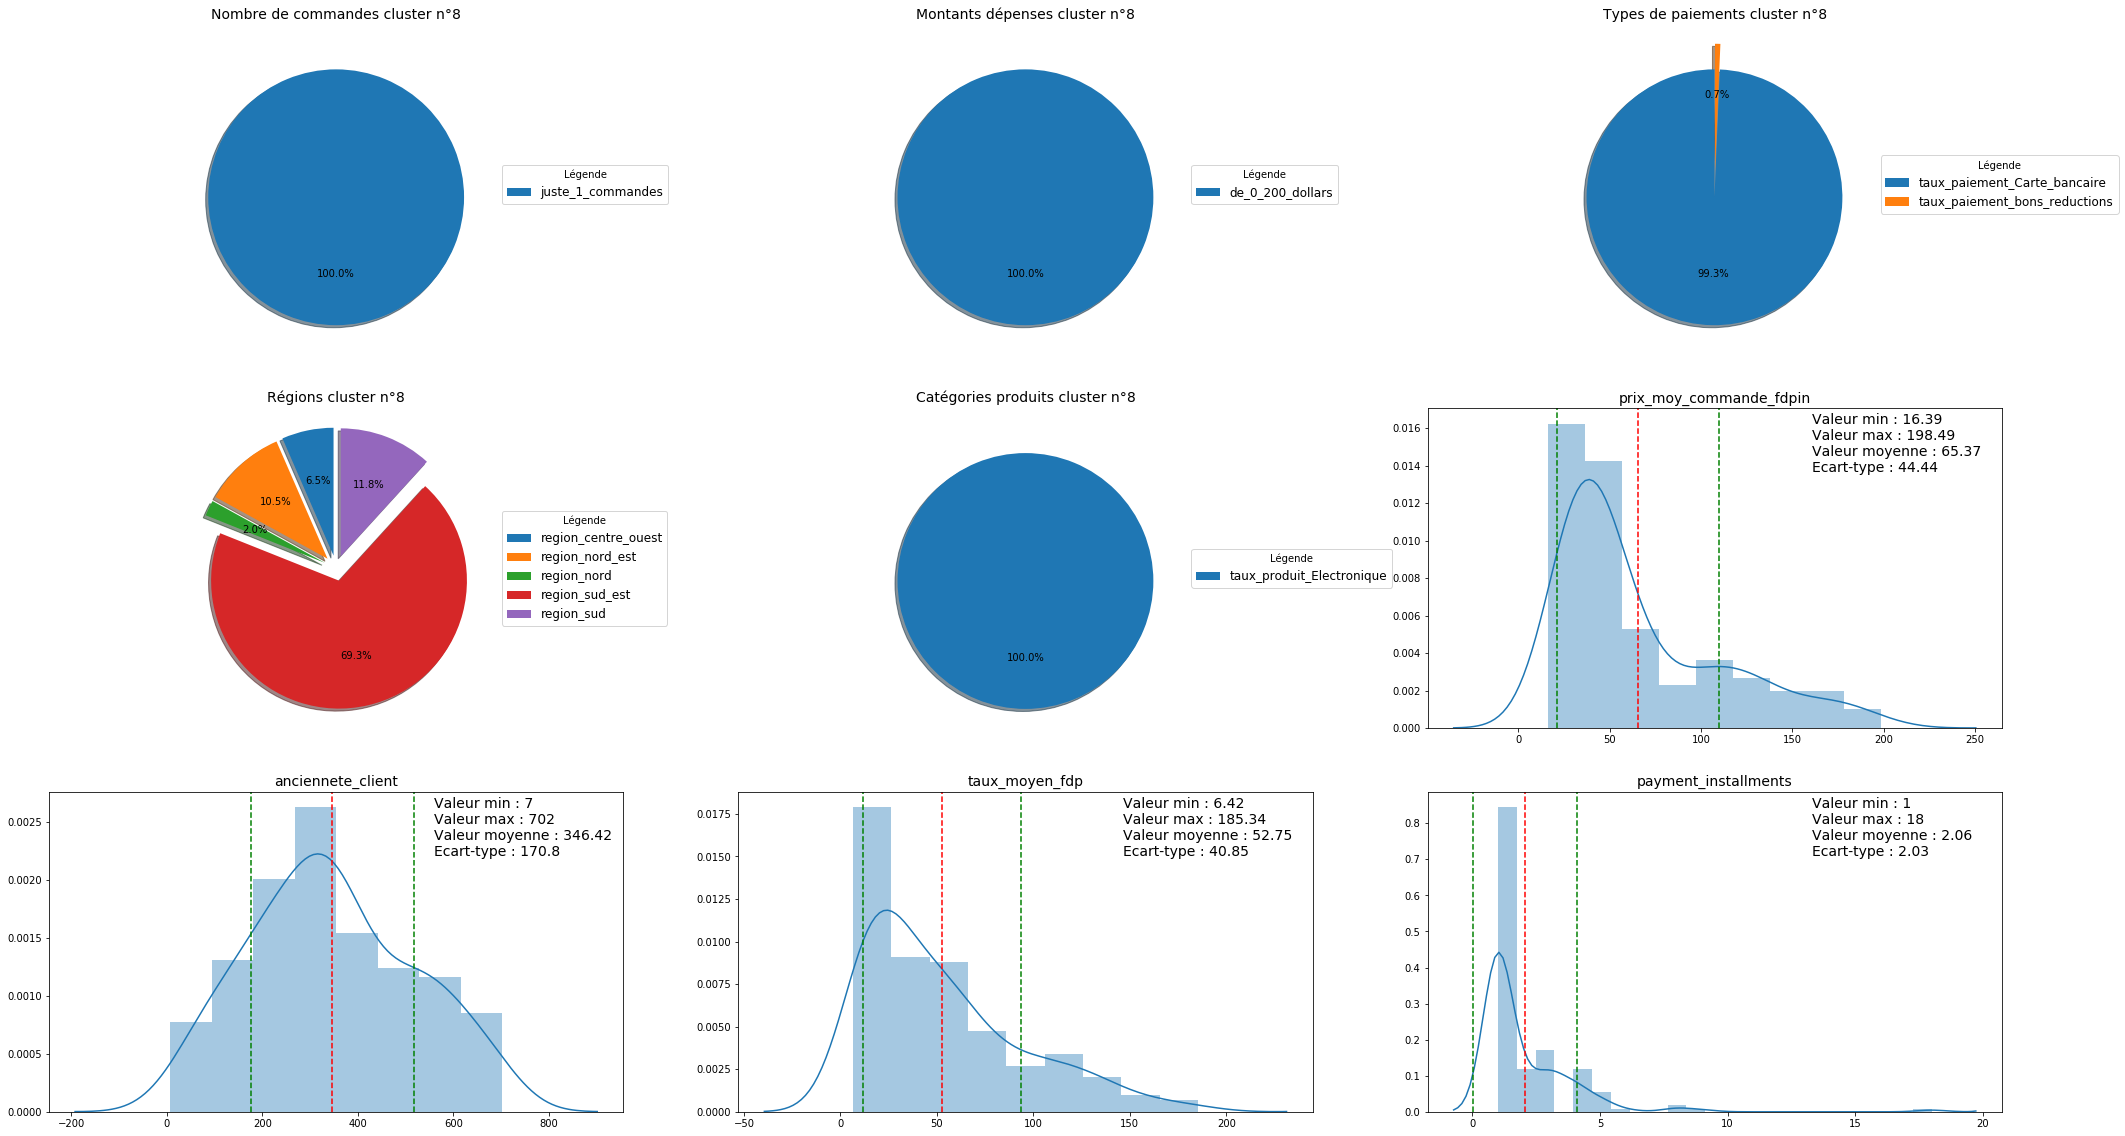

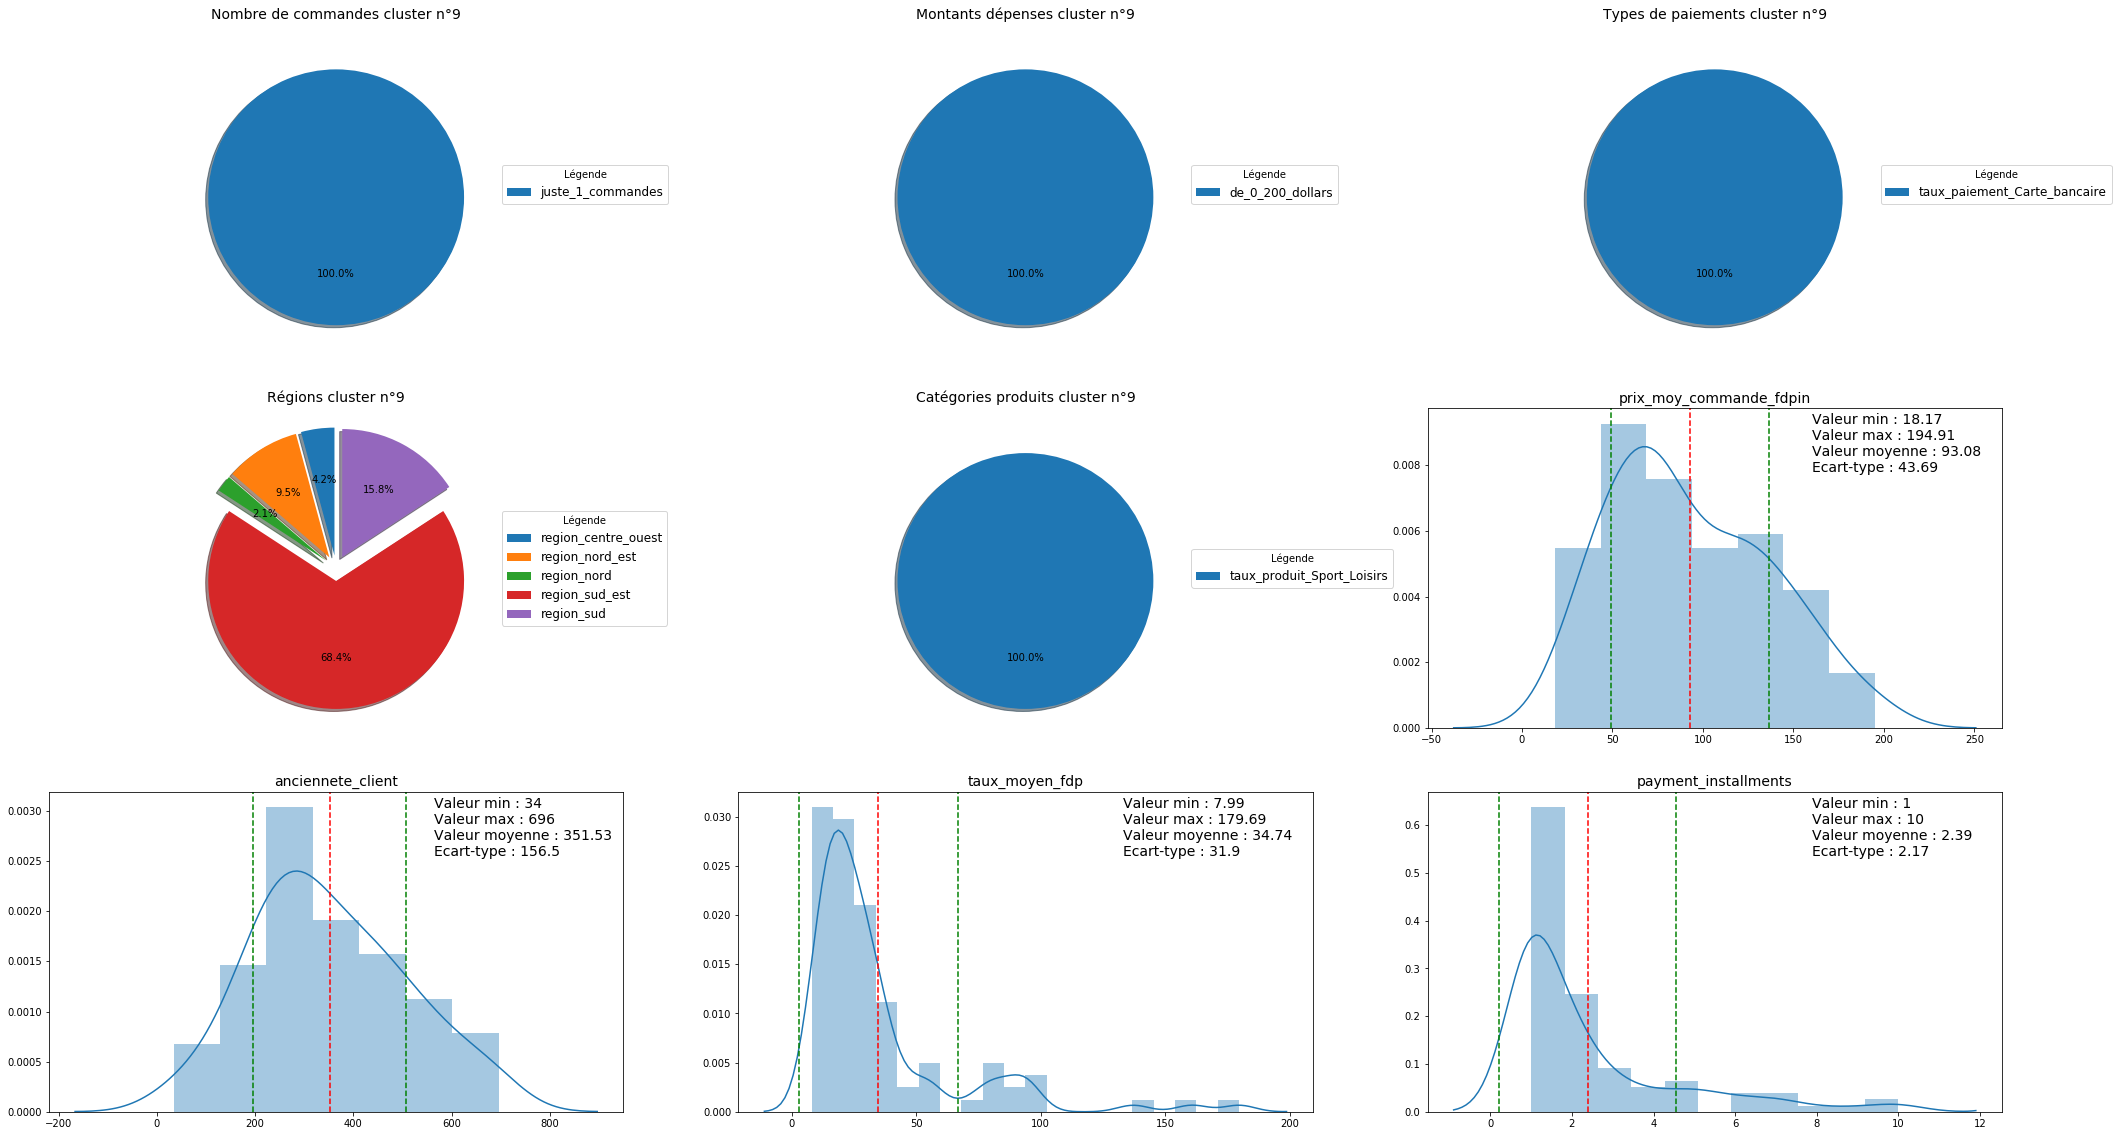

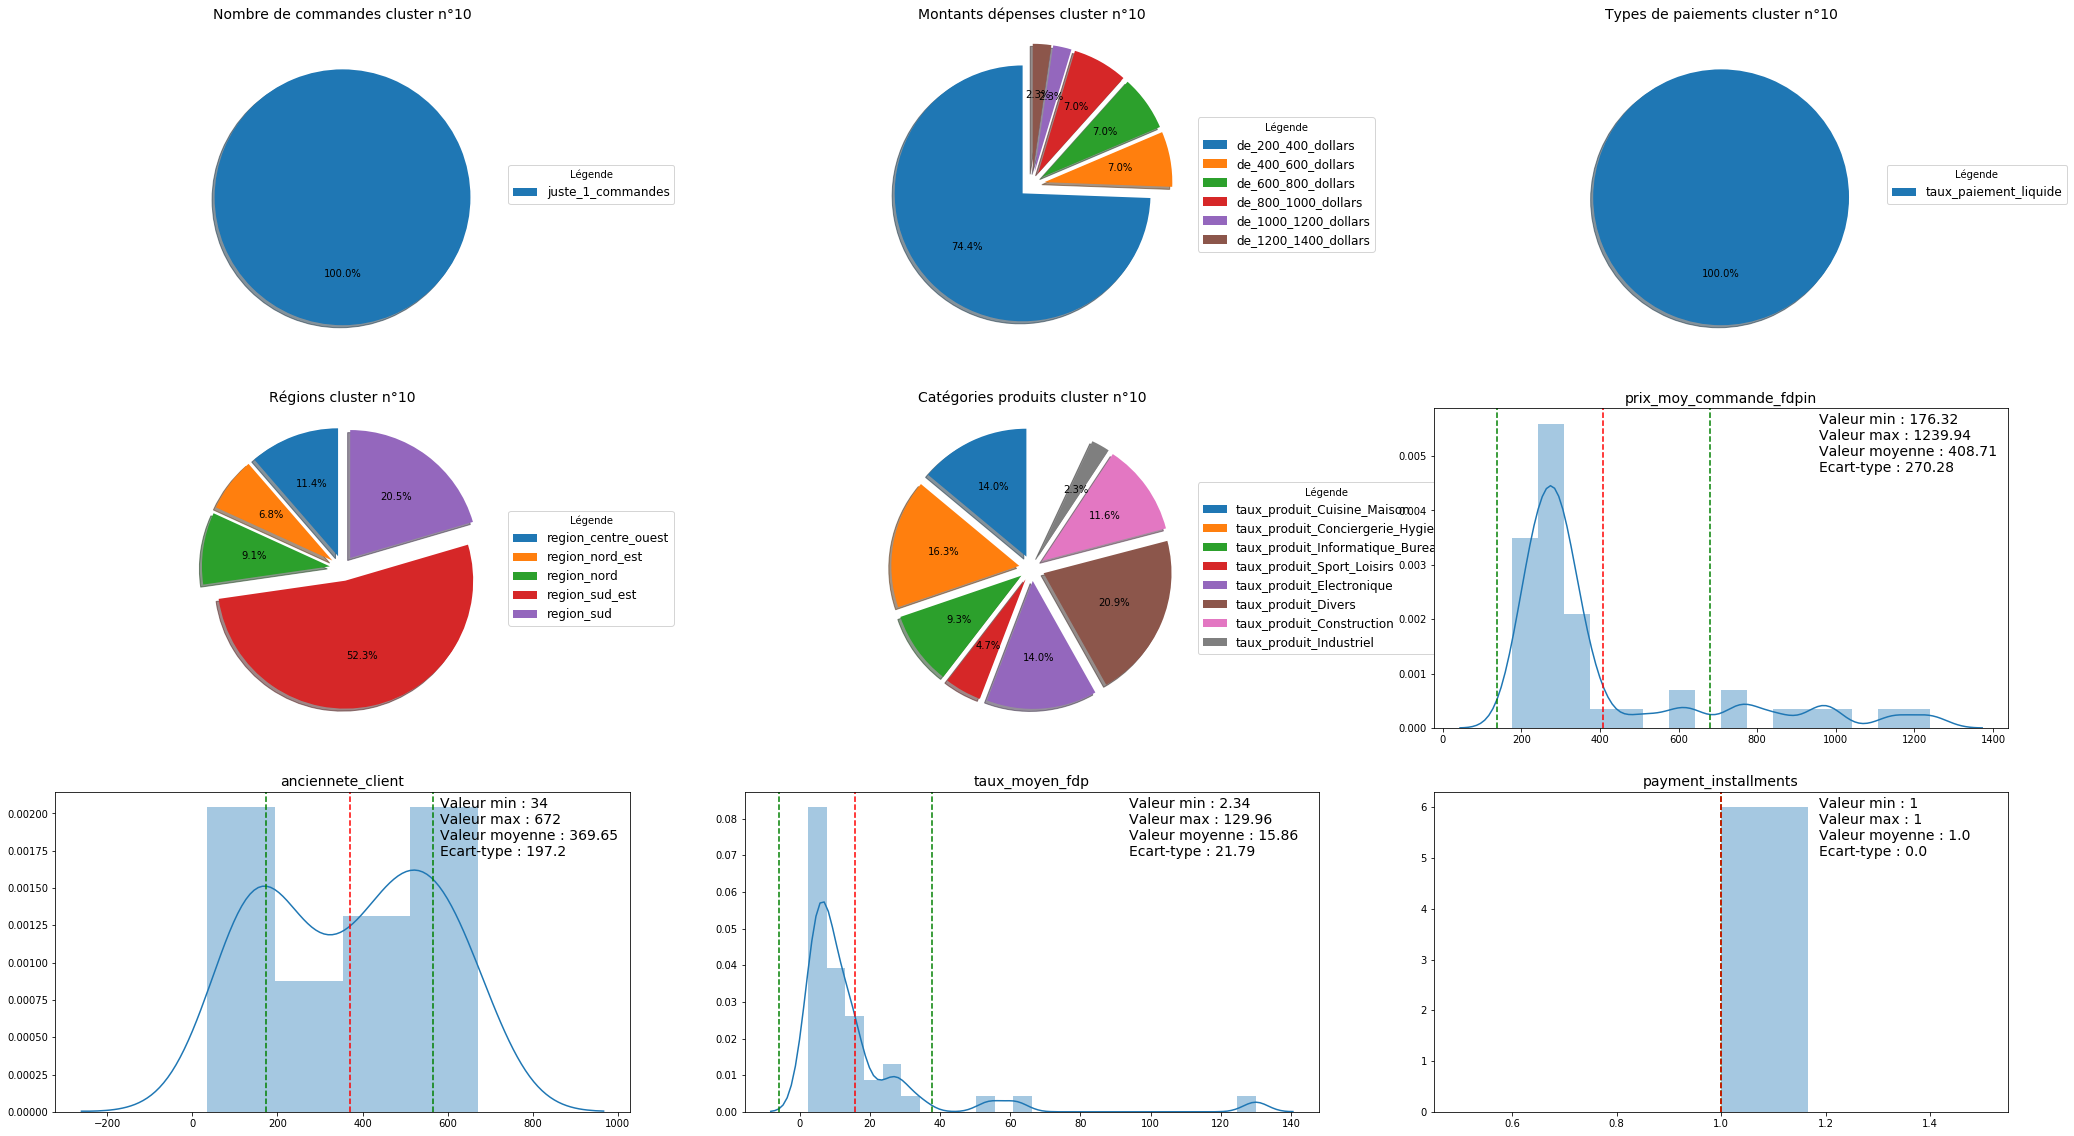

In [35]:
# %%flake8  # checking PEP8 compliance

#Préparation du dataframe avant de boucler sur chaque label de cluster
#On incrémente les numéros de label de 1 car sinon le label 0 n'est pas pris en compte par la fonction
lst_lbl = data_clustering_cah["labels"].unique()
lst_lbl = lst_lbl + 1

data_clustering_cah["labels"] += 1

for lbl in range(lst_lbl.min(), lst_lbl.max()+1):
    
    dataframe = data_clustering_cah[data_clustering_cah["labels"] == lbl]

    # Setup before calling the function
    categorical_labels = dataframe["labels"]
    dataframe = dataframe.drop("labels", axis=1)
    
    print(dataframe.shape)
    # Proceed to the "1 variable ANOVA test"
    results_anova = get_significant_features(
        dataframe,
        categorical_labels,
        threshold=0.05
    )

    # Displays results of ANOVA analysis
    #display(results_anova)

    # Get the significant features (above threshold)
    threshold = 0.05
    mask = (results_anova['p-value'] < threshold)
    significant_features = results_anova[mask].index
    print("Cluster n°", categorical_labels.unique())
    print(len(significant_features), "variables significatives pour expliquer le cluster sur", results_anova.shape[0], ".")
    display(pd.DataFrame(significant_features, columns=["Variables significatives"]))
    
    #Analyses des profils type
    plt.subplots(figsize=(35, 20))
    
    plt.subplot(3,3,1)
    #5- Nombre de commandes
    analyse_categories_somme(dataframe, lbl, "_commandes", "Nombre de commandes")
    
    plt.subplot(3,3,2)
    #1- Tranches de dépenses
    analyse_categories_somme(dataframe, lbl, "_dollars", "Montants dépenses")
    
    plt.subplot(3,3,3)
    #3- Types de paiements
    analyse_categories_moyenne(dataframe, lbl, "taux_paiement_", "Types de paiements")
    
    plt.subplot(3,3,4)
    #4- Géolocalisation
    analyse_categories_somme(dataframe, lbl, "region_", "Régions")
    
    plt.subplot(3,3,5)
    #2- Catégories de produits 
    analyse_categories_moyenne(dataframe, lbl, "taux_produit_", "Catégories produits")
    
    plt.subplot(3,3,6)
    #2- Catégories de produits 
    analyse_distributions(dataframe, "prix_moy_commande_fdpin")
    
    plt.subplot(3,3,7)
    #2- Catégories de produits 
    analyse_distributions(dataframe, "anciennete_client")
    
    plt.subplot(3,3,8)
    #2- Catégories de produits 
    analyse_distributions(dataframe, "taux_moyen_fdp")
    
    plt.subplot(3,3,9)
    #2- Facilités de paiements 
    analyse_distributions(dataframe, "payment_installments")